# 0. Imports and Plot Formatting <a name="imports"></a>

In [1]:
# IMPORTS
import sys
sys.path.append("../../")
import os

import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import *

import dill as pickle

from axion_kSZ_source.axion_camb_wrappers.run_axion_camb import AxionCAMBWrapper
from axion_kSZ_source.theory.cosmology import Cosmology
from axion_kSZ_source.theory.sigma_interpolation_FFTLog import SigmaInterpolatorFFTLog
from axion_kSZ_source.auxiliary.integration_helper import IntegrationHelper
from axion_kSZ_source.auxiliary.window_functions import WindowFunctions
from axion_kSZ_source.theory.eli_mass_functions import EliMassFunction
from axion_kSZ_source.theory.eli_mass_functions import BubbleMassFunction
from axion_kSZ_source.theory.eli_mass_functions import BMF2

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc

import cosmod

# PLOT FORMATTING

plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rc('text', usetex=True)
#plt.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]
axislabelfontsize='large'
matplotlib.mathtext.rcParams['legend.fontsize']='medium'


matplotlib.rcParams['font.family'] = 'Times New Roman'

rc("axes", linewidth=2.0)
rc("lines", markeredgewidth=4)
rc('xtick', labelsize = 20)
rc('ytick', labelsize = 20)

fig_width_pt = 703.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean=0.9
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]
#
params = {'backend': 'pdf',
             'axes.labelsize': 14,
             'lines.markersize': 4,
             'font.size': 14,
             'xtick.major.size':6,
             'xtick.minor.size':3,
             'ytick.major.size':6,
             'ytick.minor.size':3,
             'xtick.major.width':0.5,
             'ytick.major.width':0.5,
             'xtick.minor.width':0.5,
             'ytick.minor.width':0.5,
             'lines.markeredgewidth':1,
             'axes.linewidth':1.2,
             'xtick.labelsize': 14,
             'ytick.labelsize': 14,
             'savefig.dpi':2000,
   #      'path.simplify':True,
   #      'font.family': 'serif',
   #      'font.serif':'Times',
             'text.usetex':True,
             'text.latex.preamble': [r'\usepackage{amsmath}'],
             'figure.figsize': fig_size}

plt.rcParams.update(params)

/home/emelnick/anaconda3/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


# Table of Contents
1. [Imports and Plot Formatting](#imports)
1. [Cosmology](#cosmo)
    1. [Cosmology Functions](#cosmo_functions)
    1. [Cosmologies](#cosmologies)
1. [Plots and Bubble Work](#plots)
1. [Testing, Scratch, and Junk](#test)

# 1. Cosmology <a name="cosmo"></a>

Everything that is evaluated for a certain cosmology is stored in the various arrays below, and anytime a cosmology is updated or added, the changes to the arrays should be computed automatically, so they can be called easily and consistently at any time

### A. Cosmology functions<a name="cosmo_functions"></a>

In [2]:
cd = cosmod.CosmoDictionary()

##### Saved cosmology
Use pickled cosmologies by loading the saved cosmology into `cosmo_dict` with `load_cosmology()`. Save the current cosmology with `save_cosmology()`. The last three cosmology updates done with `update_cosmo()` should be in autosaved files `'autosave_0.pkl'`, `'autosave_1.pkl'`, and `'autosave_2.pkl'`, if they exist.

In [3]:
cd.load_cosmology()

In [5]:
cd.save_cosmology()

In [53]:
load_cosmology('autosave_0.pkl')

### B. Cosmologies<a name='cosmologies'></a>

Run `cd.update_cosmo()` to update an existing cosmology, or `cd.new_cosmo()` add a new cosmology. Run the cell to update/add the cosmology.

In [3]:
cd.new_cosmo(name='cosmo0',m_ax=1e-26,ax_frac=5e-8 ,h_param=0.72,rhff=True)

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
/home/emelnick/anaconda3/lib/python3.9/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "


In [7]:
cd.new_cosmo(name='cosmo1',m_ax=1e-26,ax_frac=0.005,h_param=0.72,rhff=True)

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
/home/emelnick/anaconda3/lib/python3.9/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "


In [8]:
cd.new_cosmo(name='cosmo2',m_ax=1e-26,ax_frac=0.05,h_param=0.72,rhff=True)

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


In [9]:
cd.new_cosmo(name='cosmo3',m_ax=1e-26,ax_frac=0.5,h_param=0.72,rhff=True)

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


In [39]:
cd.reset_cosmo()

# 2. Plots and Bubble Work<a name="plots"></a>

### A. Plots of cosmology information

#### `Lin_power` plot

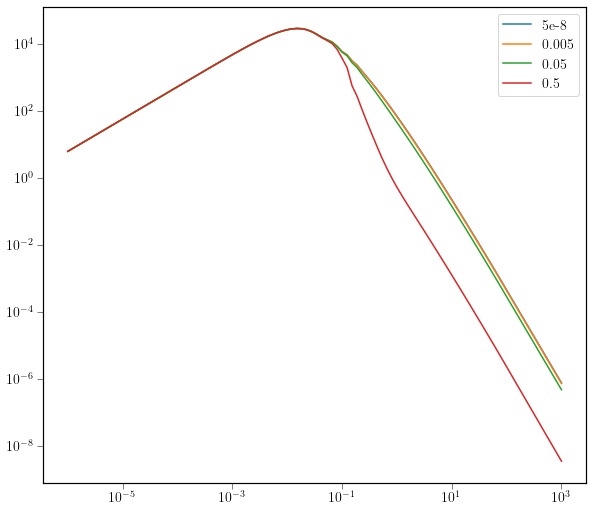

In [44]:
k_vals = np.logspace(-6, 3, 100)
plt.loglog(k_vals, cd.lin_power[0](k_vals),label='5e-8')
plt.loglog(k_vals, cd.lin_power[1](k_vals),label='0.005')
plt.loglog(k_vals, cd.lin_power[2](k_vals),label='0.05')
plt.loglog(k_vals, cd.lin_power[3](k_vals),label='0.5')
plt.legend()

#### `growth` plot

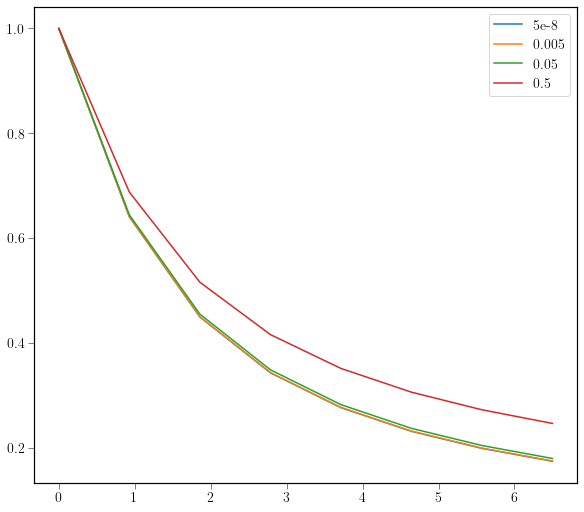

In [45]:
z_vals=np.linspace(0, 6.5, 8)
plt.plot(z_vals, cd.growth[0](1e0, z_vals),label='5e-8')
plt.plot(z_vals, cd.growth[1](1e0, z_vals),label='0.005')
plt.plot(z_vals, cd.growth[2](1e0, z_vals),label='0.05')
plt.plot(z_vals, cd.growth[3](1e0, z_vals),label='0.5')
plt.legend()

#### $\sigma$ plot as a function of mass

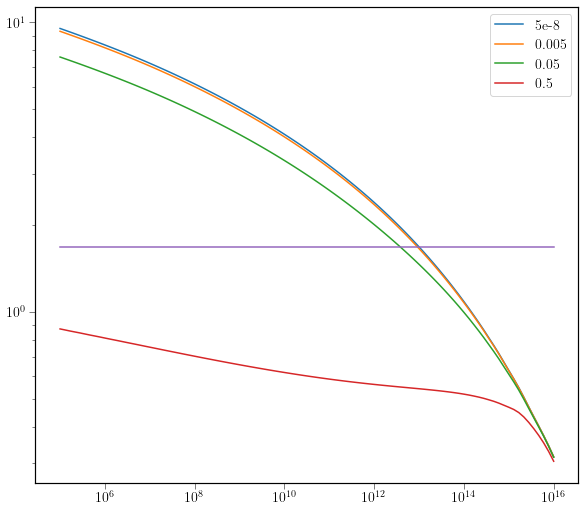

In [8]:
m_vals = np.logspace(5, 16, 100)
z = 0
plt.loglog(m_vals, cd.sigmaInt[0](m_vals, z),label='5e-8')
plt.loglog(m_vals, cd.sigmaInt[1](m_vals, z),label='0.005')
plt.loglog(m_vals, cd.sigmaInt[2](m_vals, z),label='0.05')
plt.loglog(m_vals, cd.sigmaInt[3](m_vals, z),label='0.5')
plt.loglog(m_vals,1.68*np.ones(len(m_vals)))
plt.legend()

#### Bubble mass function

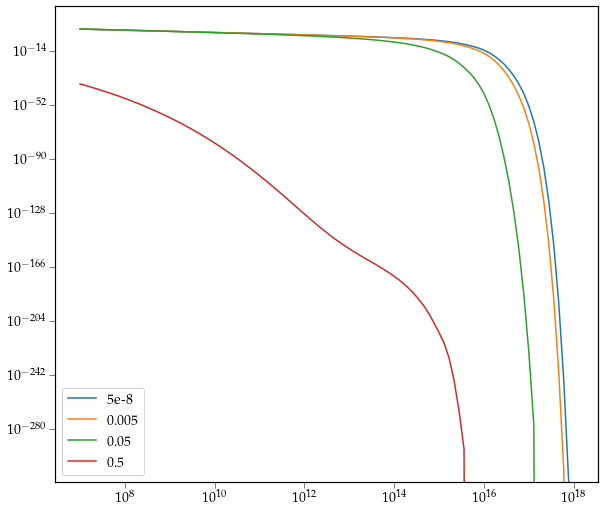

In [19]:
m_vals = np.logspace(7, 18, 100)
z = 12

plt.loglog(m_vals, cd.bubbleFunc[0](m_vals,z),label='5e-8')
plt.loglog(m_vals, cd.bubbleFunc[1](m_vals,z),label='0.005')
plt.loglog(m_vals, cd.bubbleFunc[2](m_vals,z),label='0.05')
plt.loglog(m_vals, cd.bubbleFunc[3](m_vals,z),label='0.5')

plt.legend()

#### Press-Schechter mass function

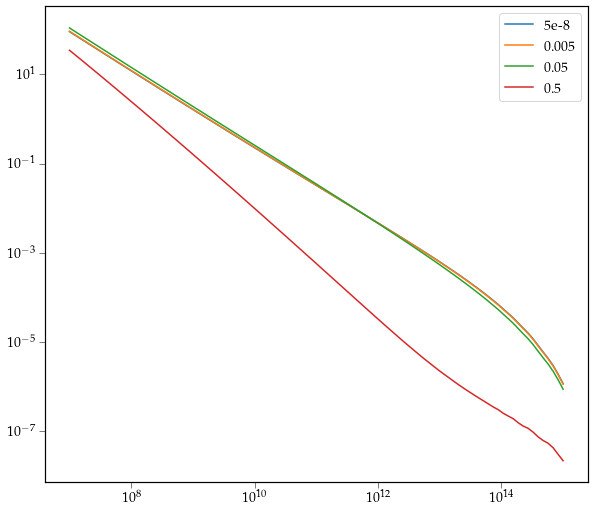

In [20]:
m_vals = np.logspace(7,15,100)
z = 0

plt.loglog(m_vals,cd.pressSchechter[0](m_vals,z),label='5e-8')
plt.loglog(m_vals,cd.pressSchechter[1](m_vals,z),label='0.005')
plt.loglog(m_vals,cd.pressSchechter[2](m_vals,z),label='0.05')
plt.loglog(m_vals,cd.pressSchechter[3](m_vals,z),label='0.5')

plt.legend()

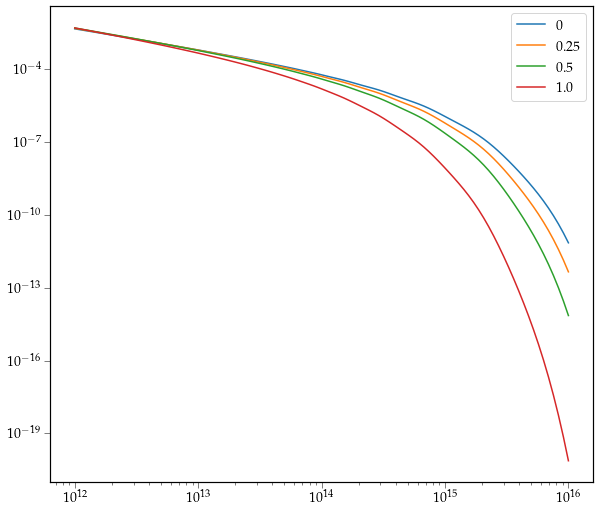

In [22]:
m_vals = np.logspace(12,16,100)

for z in [0,0.25,0.5,1.0]:
    plt.loglog(m_vals,cd.pressSchechter[0](m_vals,z),label=z)

plt.legend()

## Furlanetto Figure 2: Bubble distribution 

##### Plotting distrubtion
Distribution is $\overline{Q}^{-1}V\frac{\text{d}n}{\text{d}\ln R}$, but $\overline{Q}$ isn't working right.

In [ ]:
z_vals = [10,12,14,16,18]
zeta = 40
plt.rc('text',usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times New Roman']})

for i, (cosmo,sigma,bmf) in enumerate(zip(cd.cosmos,cd.sigmaInt,cd.bubbleFunc)):
    plt.figure()
    # z = 10
    # mMin = (1.308695e-10) * ((cosmo.RHO_C*1000 * cosmo.OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2) # Included Delta in pre-eval w/ cosmology.py OmegaM property and in solar masses
    # rho = cosmo.rho_mean * (1+z)**3

    integrand = lambda m: (np.exp(m)/rho) * bmf(np.exp(m),z)
    Q = quad(integrand,np.log(mMin),np.log(1e27))[0]
    for z in z_vals:
        rho = cosmo.rho_mean * (1+z)**3
        
        mMin = (1.308695e-10) * ((cosmo.RHO_C*1000 * cosmo.OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2) # Included Delta in pre-eval w/ cosmology.py OmegaM property and in solar masses
        integrand = lambda m: (np.exp(m)/rho) * bmf(np.exp(m),z)
        Q = quad(integrand,np.log(mMin),np.log(1e27))[0]
        
        # Q = romberg(integrand,np.log(mMin),np.log(1e27))
        
        # print(f'Q = {Q}')
        m_vals = np.logspace(4,20,500)
        R_vals = sigma.radius_of_mass(zeta*m_vals) * (1+z)**(-1)
        # R_vals = sigma.radius_of_mass(m_vals)

        plt.plot(R_vals,3*(1/Q)*(m_vals/rho)*bmf(m_vals,z),label=f'z = {z}')
        # plt.axvline(sigma.radius_of_mass(mMin),c='black',linestyle='dashed')
        plt.xscale('log')
        plt.title(f'{cd.cosmo_names[i]} Bubble Size Distribution')
        plt.xlabel(r"$R$ (Mpc)")
        plt.ylabel(r"$\overline Q^{-1}V\frac{dn}{d\ln R}$")
        plt.legend()
        plt.savefig(f'bubble_dist_norm_{i}.pdf')
        # plt.savefig(f'bubble_dist_rel10_{i}.pdf')

zeta = 40
cd.z_vals_sigma = np.linspace(0,20,25)
plt.rc('text',usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times New Roman']})

for z in [0,6,12,18]:
    # Uncomment these lines to normalize each curve relative to λCDM distribution
    # mMin = (1.308695e-10) * ((cd.cosmos[0].RHO_C*1000 * cd.cosmos[0].OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2) 
    # rho = cd.cosmos[0].rho_mean * (1+z)**3
    # integrand = lambda m: (np.exp(m)/rho) * cd.bubbleFunc[0](np.exp(m),z) 
    # Q = quad(integrand,np.log(mMin),np.log(1e27))[0]
    
    plt.figure()
    for i, cosmo in enumerate([cd.cosmos[0],cd.cosmos[1],cd.cosmos[2]]):
        rho = cosmo.rho_mean * (1+z)**3

        # Uncomment these lines to normalize each curve relative to its own distribution
        mMin = (1.308695e-10) * ((cosmo.RHO_C*1000 * cosmo.OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2)
        integrand = lambda m: (np.exp(m)/rho) * cd.bubbleFunc[i](np.exp(m),z) 
        Q = quad(integrand,np.log(mMin),np.log(1e27))[0]

        # Q = romberg(integrand,np.log(mMin),np.log(1e27))
        print(f'Q = {Q}')
        m_vals = np.logspace(4,17,500)
        R_vals = cd.sigmaInt[i].radius_of_mass(zeta*m_vals) * (1+z)**(-1)
        
        plt.plot(R_vals,3*(1/Q)*(m_vals/rho)*cd.bubbleFunc[i](m_vals,z),label=f'{cd.cosmo_names[i]}')
        # plt.axvline(sigma.radius_of_mass(mMin),c='black',linestyle='dashed')
        plt.xscale('log')
        plt.title(f'Bubble Size Distribution, z = {z}')
        plt.xlabel(r"$R$ (Mpc)")
        plt.ylabel(r"$\overline Q^{-1}V\frac{dn}{d\ln R}$")
        plt.legend()
        # plt.savefig(f'bubble_dist_Lrel_z{z}.pdf')
        plt.savefig(f'bubble_dist_norm_z{z}.pdf')


## Testing integration methods

Want to get a stable method for determining $\overline{Q}$ that hopefully doesn't throw out a bunch of warnings.

#### A bunch of $Q$ integration methods

In [39]:
z_vals = [0,9,12,16,18]
zeta = 40

plt.rc('text',usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times New Roman']})

for z in z_vals:
    
    print(f"REDSHIFT z = {z}\n")
    for i, (cosmo,sigma,ps,bubble,bubble2) in enumerate(zip(cd.cosmos,cd.sigmaInt,cd.pressSchechter,cd.bubbleFunc,cd.bubbleFunc_2)):
        print(f"COSMOLOGY {i}\n")
        print(f"Axion frac = {cosmo.axion_frac}")
        mMin = (1.308695e-10) * ((cosmo.RHO_C*1000 * cosmo.OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2) # Included Delta in pre-eval w/ cosmology.py OmegaM property and in solar masses
    #         mMin = (3.95284708e8/cosmo.h) * (1/(1+z))**(3/2)
    #         mMin = 1e1

        # mMin *= 1e-8

        rho = cosmo.rho_mean * (1+z)**3
        print(f"rho = {rho}\n")

        integrand = lambda m: (1/rho) * ps(m,z) # dn/dlogm = m dn/dm
        integrand_log = lambda m: (np.exp(m)/rho) * ps(np.exp(m),z)

        # integrand = lambda m: (1/rho) * bubble(m,z)
        # integrand_log = lambda m: (1/rho) * bubble(10**m,z)

        # integrand = lambda m: (1/rho) * bubble2(m,z)
        # integrand_log = lambda m: (1/rho) * bubble2[i](10**m,z)


    #         R_vals = np.logspace(-3,2,500)
    #         m_vals = sigma.mass_of_radius(R_vals)

        m_vals = np.logspace(1,20,1000)
        m_vals_log = np.linspace(1,20,1000)
        R_vals = sigma.radius_of_mass(m_vals)


        print("Function-object integration:")
        # Quad
        Q_quad = quad(integrand,mMin,np.inf)[0]
        Q_quad_log = quad(integrand_log,np.log(mMin),np.log(1e20))[0]     
        print(f"QUAD:\nQ = {Q_quad}\nQ_log = {Q_quad_log}\n")
        
        
        # Romberg
        Q_rmbg = romberg(integrand,mMin,1e20)
        Q_rmbg_log = romberg(integrand_log,np.log(mMin),np.log(1e20))
        print(f"ROMBERG:\nQ = {Q_rmbg}\nQ_log = {Q_rmbg_log}\n") 

        # Fixed quad
        Q_fixq = fixed_quad(integrand,mMin,1e20)[0] 
        Q_fixq_log = fixed_quad(integrand_log,np.log(mMin),np.log(1e20))[0]
        print(f"FIXED QUAD:\nQ = {Q_fixq}\nQ_log = {Q_fixq_log}\n")

        # Quadrature
        Q_qdtr = quadrature(integrand,mMin,1e20)[0]
        Q_qdtr_log = quadrature(integrand_log,np.log(mMin),np.log(1e20))[0]
        print(f"QUADRATURE:\nQ = {Q_qdtr}\nQ_log = {Q_qdtr_log}\n") 
        
        # Press Schechter
        print("\nFixed-sample integration:\n")
        # Trapezoid
        Q_trap = trapezoid((1/rho) * ps(m_vals,z),m_vals) 
        Q_trap_log = trapezoid((np.exp(m_vals_log)/rho)*ps(np.exp(m_vals_log),z),m_vals_log)
        print(f"TRAPEZOID:\nQ = {Q_trap}\nQ_log = {Q_trap_log}\n") 

        # Cumulative trapezoid
        Q_ctrp = cumulative_trapezoid((1/rho) * ps(m_vals,z),m_vals)[-1]
        Q_ctrp_log = cumulative_trapezoid((np.exp(m_vals_log)/rho)*ps(np.exp(m_vals_log),z),m_vals_log)[-1]
        print(f"CUMULATIVE TRAPEZOID:\nQ = {Q_ctrp}\nQ_log = {Q_ctrp_log}\n") 

        # Simpson
        Q_simp = simpson((1/rho) * ps(m_vals,z),m_vals) 
        Q_simp_log = simpson((np.exp(m_vals_log)/rho)*ps(np.exp(m_vals_log),z),m_vals_log)
        print(f"SIMPSON:\nQ = {Q_simp}\nQ_log = {Q_simp_log}\n") 
        
#         # Bubble mass function
#         print("\nFixed-sample integration:\n")
#         # Trapezoid
#         Q_trap = trapezoid((1/rho) * bubble(m_vals,z),m_vals) 
#         Q_trap_log = trapezoid((1/rho)*bubble(m_vals_log,z),m_vals_log)
#         print(f"TRAPEZOID:\nQ = {Q_trap}\nQ_log = {Q_trap_log}\n") 

#         # Cumulative trapezoid
#         Q_ctrp = cumulative_trapezoid((1/rho) * bubble(m_vals,z),m_vals)[-1]
#         Q_ctrp_log = cumulative_trapezoid((1/rho) * bubble(m_vals_log,z),m_vals_log)[-1]
#         print(f"CUMULATIVE TRAPEZOID:\nQ = {Q_ctrp}\nQ_log = {Q_ctrp_log}\n") 

#         # Simpson
#         Q_simp = simpson((1/rho) * bubble(m_vals,z),m_vals) 
#         Q_simp_log = simpson((1/rho) * bubble(m_vals_log,z),m_vals_log)
#         print(f"SIMPSON:\nQ = {Q_simp}\nQ_log = {Q_simp_log}\n") 

#         # Bubble mass function 2
#         print("\nFixed-sample integration:\n")
#         # Trapezoid
#         Q_trap = trapezoid((1/rho) * bubble2(m_vals,z),m_vals) 
#         Q_trap_log = trapezoid((1/rho)*bubble2(m_vals_log,z),m_vals_log)
#         print(f"TRAPEZOID:\nQ = {Q_trap}\nQ_log = {Q_trap_log}\n") 

#         # Cumulative trapezoid
#         Q_ctrp = cumulative_trapezoid((1/rho) * bubble2(m_vals,z),m_vals)[-1]
#         Q_ctrp_log = cumulative_trapezoid((1/rho) * bubble2(m_vals_log,z),m_vals_log)[-1]
#         print(f"CUMULATIVE TRAPEZOID:\nQ = {Q_ctrp}\nQ_log = {Q_ctrp_log}\n") 

#         # Simpson
#         Q_simp = simpson((1/rho) * bubble2(m_vals,z),m_vals) 
#         Q_simp_log = simpson((1/rho) * bubble2(m_vals_log,z),m_vals_log)
#         print(f"SIMPSON:\nQ = {Q_simp}\nQ_log = {Q_simp_log}\n") 

    print("#####################################################")


REDSHIFT z = 0

COSMOLOGY 0

Axion frac = 5.000000000000001e-08
rho = 75388498306.23651

Function-object integration:


/tmp/ipykernel_1225/4057536584.py:42: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Q_quad = quad(integrand,mMin,np.inf)[0]
/tmp/ipykernel_1225/4057536584.py:43: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Q_quad_log = quad(integrand_log,np.log(mMin),np.log(1e20))[0]


QUAD:
Q = -1.2855529380001596e-11
Q_log = 0.7263360467781311

ROMBERG:
Q = 382370.3382947656
Q_log = 0.7263360450057402

FIXED QUAD:
Q = 0.0
Q_log = 0.6910645864254632

QUADRATURE:
Q = 0.0
Q_log = 0.7274495914249761


Fixed-sample integration:

TRAPEZOID:
Q = 0.9103073169663565
Q_log = 0.16007272175700732

CUMULATIVE TRAPEZOID:
Q = 0.9103073169663572
Q_log = 0.16007272175700724

SIMPSON:
Q = 0.910013886747864
Q_log = 0.16007265081895222

COSMOLOGY 1

Axion frac = 0.005000000000000001
rho = 75388498306.23651

Function-object integration:
QUAD:
Q = -1.3060789933325735e-11
Q_log = 0.7206956728354517



/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.884763e+05
  warnings.warn(
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.352612e-08
  warnings.warn(


ROMBERG:
Q = 388475.5358884661
Q_log = 0.7206956710371911

FIXED QUAD:
Q = 0.0
Q_log = 0.6853234886216686

QUADRATURE:
Q = 0.0
Q_log = 0.7217902214580215


Fixed-sample integration:

TRAPEZOID:
Q = 0.9082122735408191
Q_log = 0.16325258221382513

CUMULATIVE TRAPEZOID:
Q = 0.9082122735408188
Q_log = 0.16325258221382502

SIMPSON:
Q = 0.9079194740452746
Q_log = 0.1632525105288037

COSMOLOGY 2

Axion frac = 0.05000000000000002
rho = 75388498306.23651

Function-object integration:


/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:277: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.233498e-03
  warnings.warn(


QUAD:
Q = -1.4951251877192384e-11
Q_log = 0.6646873856342912



/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 4.447056e+05
  warnings.warn(
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.921188e-08
  warnings.warn(
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:277: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.870083e-03
  warnings.warn(


ROMBERG:
Q = 444704.7701639071
Q_log = 0.6646873842363965

FIXED QUAD:
Q = 0.0
Q_log = 0.6332193447462634

QUADRATURE:
Q = 0.0
Q_log = 0.6656138271749489


Fixed-sample integration:

TRAPEZOID:
Q = 0.8868444644633225
Q_log = 0.1945771438320923

CUMULATIVE TRAPEZOID:
Q = 0.8868444644633222
Q_log = 0.19457714383209243

SIMPSON:
Q = 0.8865580980174006
Q_log = 0.1945770672497275

COSMOLOGY 3

Axion frac = 0.5
rho = 75388498306.23653

Function-object integration:
QUAD:
Q = 1.435239790669303e-09
Q_log = 0.008962079345042407



/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.057509e+04
  warnings.warn(


ROMBERG:
Q = 30575.030786958458
Q_log = 0.008962079216535593

FIXED QUAD:
Q = 0.0
Q_log = 0.009827225690216084

QUADRATURE:
Q = 0.0
Q_log = 0.008988751049766385


Fixed-sample integration:

TRAPEZOID:
Q = 0.14630802676458152
Q_log = 0.15091005827639065

CUMULATIVE TRAPEZOID:
Q = 0.14630802676458146
Q_log = 0.15091005827639056

SIMPSON:
Q = 0.14625480815043096
Q_log = 0.15091023954431543

#####################################################
REDSHIFT z = 9

COSMOLOGY 0

Axion frac = 5.000000000000001e-08
rho = 75388498306236.52

Function-object integration:
QUAD:
Q = 3.779781647257272e-10
Q_log = 4.439991502235061e-05



/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:277: AccuracyWarning: maxiter (50) exceeded. Latest difference = 5.072525e-05
  warnings.warn(
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 8.052182e+03
  warnings.warn(


ROMBERG:
Q = 8052.166787295038
Q_log = 4.439882667677484e-05

FIXED QUAD:
Q = 0.0
Q_log = 4.284982162505539e-05

QUADRATURE:
Q = 0.0
Q_log = 4.440221324812496e-05


Fixed-sample integration:

TRAPEZOID:
Q = 0.0003904208245772541
Q_log = 0.0003997747474684981

CUMULATIVE TRAPEZOID:
Q = 0.0003904208245772546
Q_log = 0.0003997747474684981

SIMPSON:
Q = 0.00039028583714681566
Q_log = 0.00039977485641210647

COSMOLOGY 1

Axion frac = 0.005000000000000001
rho = 75388498306236.52

Function-object integration:
QUAD:
Q = 3.579492051005168e-10
Q_log = 4.0845491605053926e-05



/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 7.625500e+03
  warnings.warn(


ROMBERG:
Q = 7625.485244765275
Q_log = 4.084447531203469e-05

FIXED QUAD:
Q = 0.0
Q_log = 3.958428887359723e-05

QUADRATURE:
Q = 0.0
Q_log = 4.08481799739044e-05


Fixed-sample integration:

TRAPEZOID:
Q = 0.0003818550155703896
Q_log = 0.00039316873104378486

CUMULATIVE TRAPEZOID:
Q = 0.00038185501557038906
Q_log = 0.00039316873104378513

SIMPSON:
Q = 0.0003817227352057456
Q_log = 0.0003931688361234323

COSMOLOGY 2

Axion frac = 0.05000000000000002
rho = 75388498306236.52

Function-object integration:
QUAD:
Q = 1.926200345311008e-10
Q_log = 1.683273637090545e-05



/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 4.103446e+03
  warnings.warn(


ROMBERG:
Q = 4103.438140504064
Q_log = 1.6833143254790198e-05

FIXED QUAD:
Q = 0.0
Q_log = 1.7130392430363233e-05

QUADRATURE:
Q = 0.0
Q_log = 1.6836763816829202e-05


Fixed-sample integration:

TRAPEZOID:
Q = 0.00030298904755157426
Q_log = 0.0003256224665738937

CUMULATIVE TRAPEZOID:
Q = 0.0003029890475515744
Q_log = 0.00032562246657389407

SIMPSON:
Q = 0.0003028819229451292
Q_log = 0.0003256225301432443

COSMOLOGY 3

Axion frac = 0.5
rho = 75388498306236.53

Function-object integration:
QUAD:
Q = 3.453390335964592e-45
Q_log = 1.6364432098956117e-41

ROMBERG:
Q = 4.122622037052607e-29
Q_log = 6.731831204836824e-40

FIXED QUAD:
Q = 0.0
Q_log = 1.9648754494717168e-45

QUADRATURE:
Q = 0.0
Q_log = 8.893148975025585e-72


Fixed-sample integration:

TRAPEZOID:
Q = 2.0403275423940515e-14
Q_log = 1.6091846355557324e-13

CUMULATIVE TRAPEZOID:
Q = 2.0403275423940512e-14
Q_log = 1.6091846355557292e-13

SIMPSON:
Q = 2.0391267008790187e-14
Q_log = 1.6085220301345537e-13

##########################

/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.022204e+03
  warnings.warn(


ROMBERG:
Q = 2022.2000135506967
Q_log = 5.073748524038107e-06

FIXED QUAD:
Q = 0.0
Q_log = 5.267529950545316e-06

QUADRATURE:
Q = 0.0
Q_log = 5.071596493802285e-06


Fixed-sample integration:

TRAPEZOID:
Q = 0.00012039281946618703
Q_log = 0.00013202935330959735

CUMULATIVE TRAPEZOID:
Q = 0.00012039281946618716
Q_log = 0.0001320293533095973

SIMPSON:
Q = 0.00012034966546209493
Q_log = 0.00013202937076107994

COSMOLOGY 1

Axion frac = 0.005000000000000001
rho = 165628530778801.62

Function-object integration:
QUAD:
Q = 8.650546195557612e-11
Q_log = 4.49161499130834e-06



/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.842863e+03
  warnings.warn(


ROMBERG:
Q = 1842.8596714143293
Q_log = 4.491257809179431e-06

FIXED QUAD:
Q = 0.0
Q_log = 4.681980284459188e-06

QUADRATURE:
Q = 0.0
Q_log = 4.492044158632167e-06


Fixed-sample integration:

TRAPEZOID:
Q = 0.0001166235577673886
Q_log = 0.00012835059618860248

CUMULATIVE TRAPEZOID:
Q = 0.00011662355776738853
Q_log = 0.00012835059618860264

SIMPSON:
Q = 0.00011658163485943866
Q_log = 0.00012835061154855708

COSMOLOGY 2

Axion frac = 0.05000000000000002
rho = 165628530778801.62

Function-object integration:
QUAD:
Q = 3.092811136862234e-11
Q_log = 1.2298036446026885e-06



/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 6.588761e+02
  warnings.warn(


ROMBERG:
Q = 658.8748262002823
Q_log = 1.2297486933243156e-06

FIXED QUAD:
Q = 0.0
Q_log = 1.2944015371298847e-06

QUADRATURE:
Q = 0.0
Q_log = 9.22188960317476e-09


Fixed-sample integration:

TRAPEZOID:
Q = 8.363007894118845e-05
Q_log = 9.508460619013648e-05

CUMULATIVE TRAPEZOID:
Q = 8.363007894118846e-05
Q_log = 9.508460619013647e-05

SIMPSON:
Q = 8.359909172772757e-05
Q_log = 9.508460698640844e-05

COSMOLOGY 3

Axion frac = 0.5
rho = 165628530778801.66

Function-object integration:
QUAD:
Q = 7.392620877194363e-62
Q_log = 1.5793136949773229e-58

ROMBERG:
Q = 8.825959524881363e-46
Q_log = 9.858945960209473e-57

FIXED QUAD:
Q = 0.0
Q_log = 3.6579679296914044e-65

QUADRATURE:
Q = 0.0
Q_log = 4.997075234342216e-108


Fixed-sample integration:

TRAPEZOID:
Q = 2.0879252109883793e-19
Q_log = 4.40569857288581e-18

CUMULATIVE TRAPEZOID:
Q = 2.0879252109883802e-19
Q_log = 4.405698572885813e-18

SIMPSON:
Q = 2.086623577214179e-19
Q_log = 4.4018574911996946e-18

################################

/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.325322e+02
  warnings.warn(


ROMBERG:
Q = 232.53180130027786
Q_log = 2.5511655113854294e-07

FIXED QUAD:
Q = 0.0
Q_log = 2.6470499264147916e-07

QUADRATURE:
Q = 0.0
Q_log = 5.82130661195911e-10


Fixed-sample integration:

TRAPEZOID:
Q = 2.943295742310773e-05
Q_log = 3.4268927509411896e-05

CUMULATIVE TRAPEZOID:
Q = 2.9432957423107756e-05
Q_log = 3.426892750941196e-05

SIMPSON:
Q = 2.942178176984867e-05
Q_log = 3.4268924884896335e-05

COSMOLOGY 1

Axion frac = 0.005000000000000001
rho = 370383692178540.0

Function-object integration:
QUAD:
Q = 9.363062922371831e-12
Q_log = 2.1383908640462998e-07



/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.994677e+02
  warnings.warn(
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.759419e+01
  warnings.warn(


ROMBERG:
Q = 199.46735564661884
Q_log = 2.1243006134478144e-07

FIXED QUAD:
Q = 0.0
Q_log = 2.1899129777166263e-07

QUADRATURE:
Q = 0.0
Q_log = 3.738475847927604e-10


Fixed-sample integration:

TRAPEZOID:
Q = 2.8081179118139182e-05
Q_log = 3.2830783077113945e-05

CUMULATIVE TRAPEZOID:
Q = 2.8081179118139196e-05
Q_log = 3.283078307711398e-05

SIMPSON:
Q = 2.8070470356129815e-05
Q_log = 3.2830780078580286e-05

COSMOLOGY 2

Axion frac = 0.05000000000000002
rho = 370383692178540.0

Function-object integration:
QUAD:
Q = 1.7646730274413352e-12
Q_log = 3.093748276739447e-08

ROMBERG:
Q = 37.59411723448345
Q_log = 3.0694921161535624e-08

FIXED QUAD:
Q = 0.0
Q_log = 2.809098090038416e-08

QUADRATURE:
Q = 0.0
Q_log = 3.2948572837991334e-12


Fixed-sample integration:

TRAPEZOID:
Q = 1.7160613828892573e-05
Q_log = 2.095688583608103e-05

CUMULATIVE TRAPEZOID:
Q = 1.7160613828892556e-05
Q_log = 2.0956885836081047e-05

SIMPSON:
Q = 1.7153764428682656e-05
Q_log = 2.0956880418614292e-05

COSMOLOGY 3

/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 6.906000e+01
  warnings.warn(


ROMBERG:
Q = 69.05986863781739
Q_log = 5.3540138716332567e-08

FIXED QUAD:
Q = 0.0
Q_log = 5.2283393175872484e-08

QUADRATURE:
Q = 0.0
Q_log = 1.977630514031027e-11


Fixed-sample integration:

TRAPEZOID:
Q = 1.5049752229042877e-05
Q_log = 1.8074345802491863e-05

CUMULATIVE TRAPEZOID:
Q = 1.5049752229042876e-05
Q_log = 1.8074345802491842e-05

SIMPSON:
Q = 1.5043848930090516e-05
Q_log = 1.8074342384153368e-05

COSMOLOGY 1

Axion frac = 0.005000000000000001
rho = 517089709882476.25

Function-object integration:
QUAD:
Q = 2.6885643411348668e-12
Q_log = 4.357207379871901e-08



/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 5.727678e+01
  warnings.warn(
/home/emelnick/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:850: AccuracyWarning: divmax (10) exceeded. Latest difference = 7.567719e+00
  warnings.warn(


ROMBERG:
Q = 57.27666969563404
Q_log = 4.314703057723194e-08

FIXED QUAD:
Q = 0.0
Q_log = 4.152922174691885e-08

QUADRATURE:
Q = 0.0
Q_log = 1.1606132343549121e-11


Fixed-sample integration:

TRAPEZOID:
Q = 1.4235985263136629e-05
Q_log = 1.7181585755708966e-05

CUMULATIVE TRAPEZOID:
Q = 1.423598526313666e-05
Q_log = 1.718158575570897e-05

SIMPSON:
Q = 1.4230372323661715e-05
Q_log = 1.7181582164160324e-05

COSMOLOGY 2

Axion frac = 0.05000000000000002
rho = 517089709882476.25

Function-object integration:
QUAD:
Q = 3.552257058721687e-13
Q_log = 4.4266998344701935e-09

ROMBERG:
Q = 7.567704535470435
Q_log = 1.2759877842568293e-08

FIXED QUAD:
Q = 0.0
Q_log = 3.468902632682e-09

QUADRATURE:
Q = 0.0
Q_log = 3.974692493960925e-14


Fixed-sample integration:

TRAPEZOID:
Q = 7.95018264565365e-06
Q_log = 1.0110714350400549e-05

CUMULATIVE TRAPEZOID:
Q = 7.950182645653656e-06
Q_log = 1.0110714350400533e-05

SIMPSON:
Q = 7.946874498378456e-06
Q_log = 1.0110709707764858e-05

COSMOLOGY 3

Axion f

## $\overline{Q}$ vs. $z$

#### Logarithmic $z$, linear and logarithmic $\overline{Q}$

/home/emelnick/anaconda3/lib/python3.9/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "


finished cosmo 0
finished cosmo 1
finished cosmo 2
finished cosmo 3


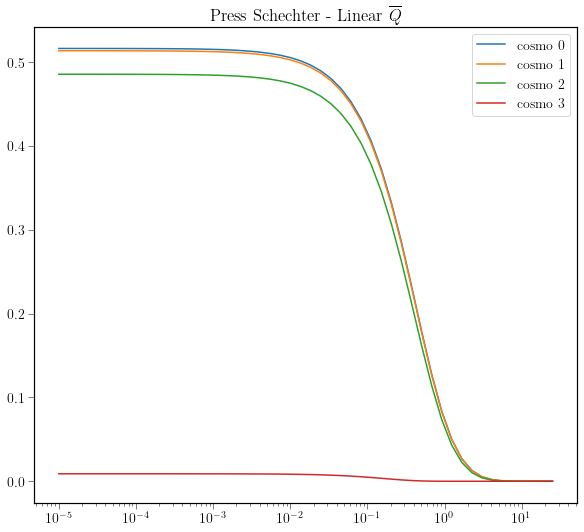

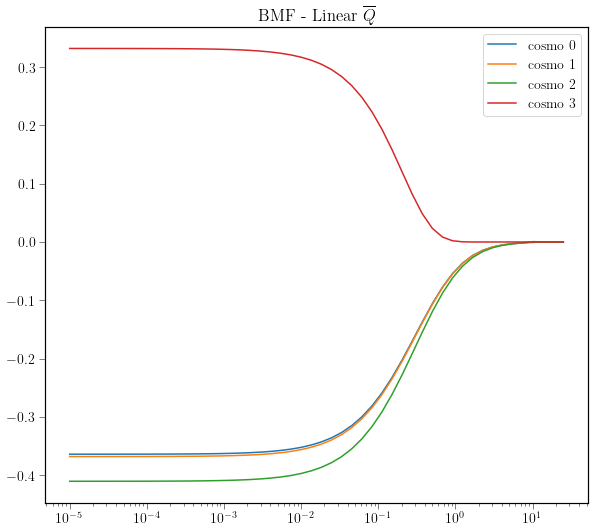

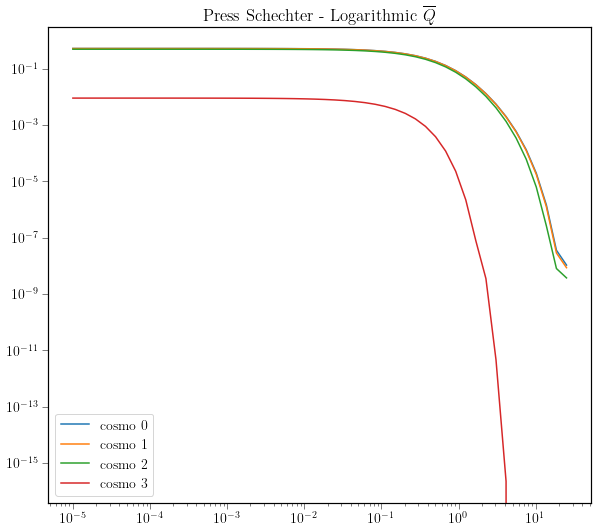

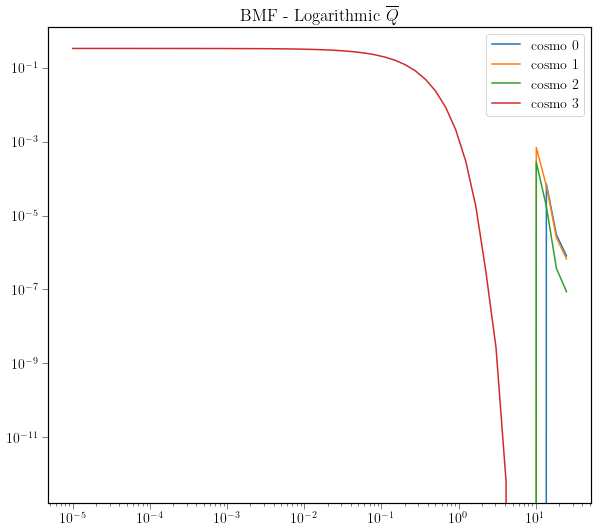

In [4]:
n = 50
z_vals = np.logspace(-5,np.log10(25),n)
cd.z_vals_sigma = z_vals
zeta = 40

plt.rc('text',usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times New Roman']})

for i, cosmo in enumerate(cd.cosmos):
    
    Q_PS = []
    Q_BMF = []

    for z in z_vals:
        mMin = (1.308695e-10) * ((cosmo.RHO_C*1000 * cosmo.OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2) # Included Delta in pre-eval w/ cosmology.py OmegaM property and in solar masses
        # mMin *= 1e-8

        rho = cosmo.rho_mean * (1+z)**3    
        # Log-domain integrals
        integrand_PS = lambda m: (np.exp(m)/rho) * cd.pressSchechter[i](np.exp(m),z)
        integrand_BMF = lambda m: (np.exp(m)/rho) * cd.bubbleFunc[i](np.exp(m),z)

        # thisQ_PS.append(quad(integrand_PS,np.log(mMin),np.log(1.e20))[0])
        # thisQ_BMF.append(quad(integrand_BMF,np.log(mMin),np.log(1.e20))[0])

        Q_PS.append(romberg(integrand_PS,np.log(mMin),np.log(1.e20),divmax=11))
        Q_BMF.append(romberg(integrand_BMF,np.log(mMin),np.log(1.e20),divmax=11))

    plt.figure(0)
    plt.plot(z_vals,1-np.exp(-np.array(Q_PS)),label=f'cosmo {i}')

    # print(f'Q_PS(z=0) = {Q_PS[0]}')
    # print(f'x_e(z=0) = {(1-np.exp(-Q_PS[0]))}')

    plt.figure(1)
    plt.plot(z_vals,1-np.exp(-np.array(Q_BMF)),label=f'cosmo {i}')
    # print(f'Q_BMF(z=0) = {Q_BMF[0]}')
    # print(f'x_e(z=0) = {(1-np.exp(-np.array(Q_BMF[0])))}')
    
    plt.figure(2)
    plt.loglog(z_vals,1-np.exp(-np.array(Q_PS)),label=f'cosmo {i}')
    
    plt.figure(3)
    plt.loglog(z_vals,1-np.exp(-np.array(Q_BMF)),label=f'cosmo {i}')
    
    print(f'finished cosmo {i}')
    
plt.figure(0)
plt.xscale('log')
plt.title(r'Press Schechter - Linear $\overline{Q}$')
plt.legend()

plt.figure(1)
plt.xscale('log')
plt.title(r'BMF - Linear $\overline{Q}$')
plt.legend()

plt.figure(2)
plt.title(r'Press Schechter - Logarithmic $\overline{Q}$')
plt.legend()

plt.figure(3)
plt.title(r'BMF - Logarithmic $\overline{Q}$')
plt.legend()

#### Linear $z$, linear and logarithmic $\overline{Q}$

/home/emelnick/anaconda3/lib/python3.9/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "


finished cosmo 0
finished cosmo 1
finished cosmo 2
finished cosmo 3


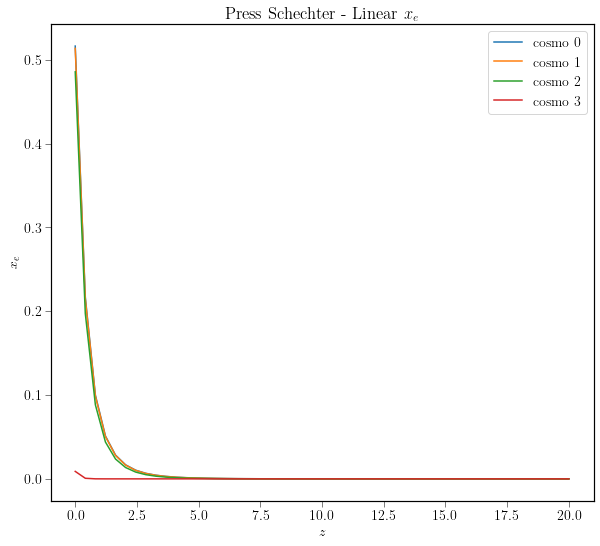

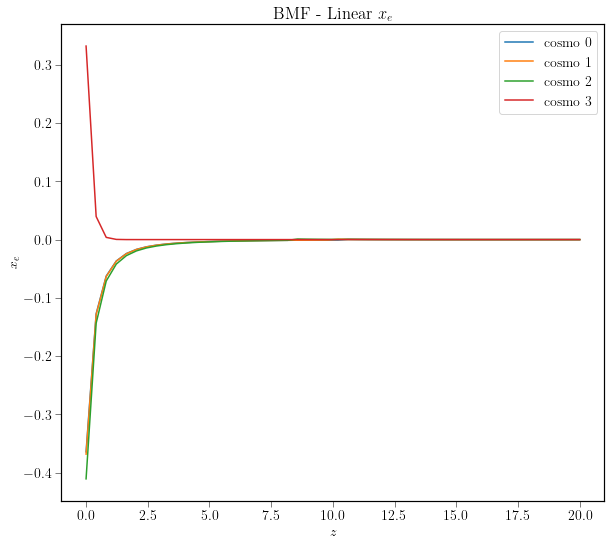

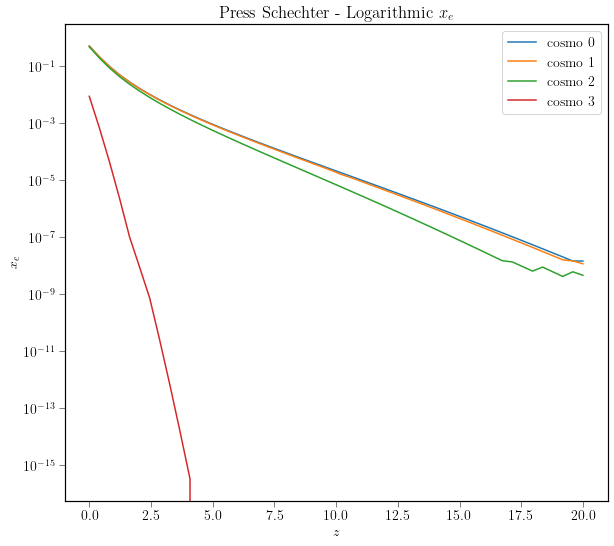

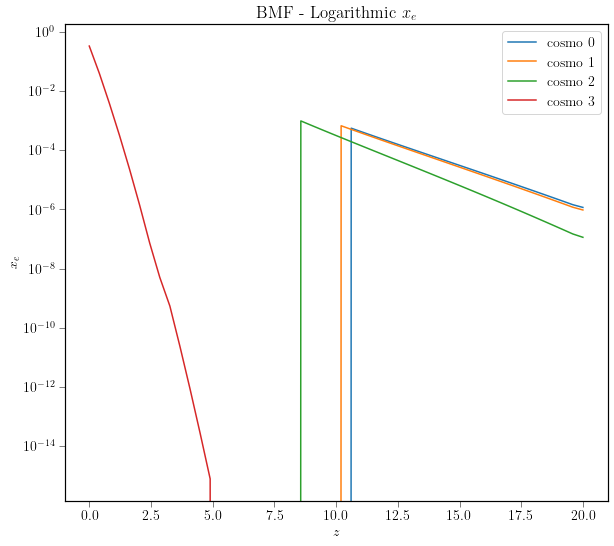

In [5]:
n = 50
z_vals = np.linspace(0,20,n)
cd.z_vals_sigma = z_vals
zeta = 40

plt.rc('text',usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times New Roman']})

for i, cosmo in enumerate(cd.cosmos):
    
    Q_PS = []
    Q_BMF = []

    for z in z_vals:
        mMin = (1.308695e-10) * ((cosmo.RHO_C*1000 * cosmo.OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2) # Included Delta in pre-eval w/ cosmology.py OmegaM property and in solar masses
        # mMin *= 1e-8

        rho = cosmo.rho_mean * (1+z)**3    
        # Log-domain integrals
        integrand_PS = lambda m: (np.exp(m)/rho) * cd.pressSchechter[i](np.exp(m),z)
        integrand_BMF = lambda m: (np.exp(m)/rho) * cd.bubbleFunc[i](np.exp(m),z)

        # thisQ_PS.append(quad(integrand_PS,np.log(mMin),np.log(1.e20))[0])
        # thisQ_BMF.append(quad(integrand_BMF,np.log(mMin),np.log(1.e20))[0])

        Q_PS.append(romberg(integrand_PS,np.log(mMin),np.log(1.e20),divmax=11))
        Q_BMF.append(romberg(integrand_BMF,np.log(mMin),np.log(1.e20),divmax=11))

    plt.figure(0)
    plt.plot(z_vals,1-np.exp(-np.array(Q_PS)),label=f'cosmo {i}')

    # print(f'Q_PS(z=0) = {Q_PS[0]}')
    # print(f'x_e(z=0) = {(1-np.exp(-Q_PS[0]))}')

    plt.figure(1)
    plt.plot(z_vals,1-np.exp(-np.array(Q_BMF)),label=f'cosmo {i}')
    # print(f'Q_BMF(z=0) = {Q_BMF[0]}')
    # print(f'x_e(z=0) = {(1-np.exp(-np.array(Q_BMF[0])))}')
    
    plt.figure(2)
    plt.plot(z_vals,1-np.exp(-np.array(Q_PS)),label=f'cosmo {i}')
    
    plt.figure(3)
    plt.plot(z_vals,1-np.exp(-np.array(Q_BMF)),label=f'cosmo {i}')
    
    print(f'finished cosmo {i}')
    
plt.figure(0)
plt.xlabel(r'$z$')
plt.ylabel(r'$x_e$')
plt.title(r'Press Schechter - Linear $x_e$')
plt.legend()

plt.figure(1)
plt.xlabel(r'$z$')
plt.ylabel(r'$x_e$')
plt.title(r'BMF - Linear $x_e$')
plt.legend()

plt.figure(2)
plt.xlabel(r'$z$')
plt.ylabel(r'$x_e$')
plt.yscale('log')
plt.title(r'Press Schechter - Logarithmic $x_e$')
plt.legend()

plt.figure(3)
plt.xlabel(r'$z$')
plt.ylabel(r'$x_e$')
plt.yscale('log')
plt.title(r'BMF - Logarithmic $x_e$')
plt.legend()

# 3. Testing, Scratch, and Junk<a name="test"></a>

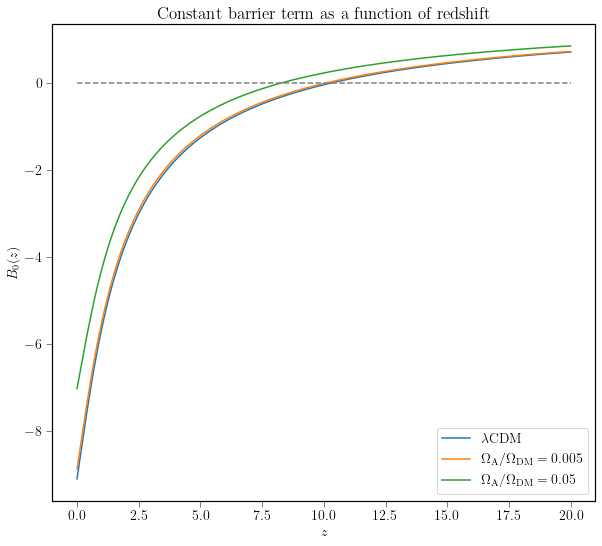

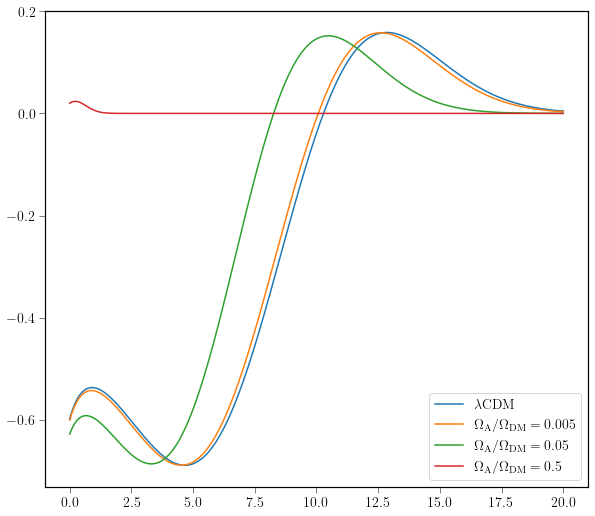

In [215]:
z = np.linspace(0,20,200)
for i, cosmo in enumerate([cd.cosmos[0],cd.cosmos[1],cd.cosmos[2]]):
    plt.plot(z,cd.bubbleFunc[i].B0(z),label=cd.cosmo_names[i])
plt.plot(z,np.zeros(200),linestyle='--',color='gray')
plt.title('Constant barrier term as a function of redshift')
plt.xlabel('$z$')
plt.ylabel('$B_0(z)$')
plt.legend()
plt.savefig('b0_negative.pdf')

plt.figure()
for i, cosmo in enumerate(cd.cosmos):
    plt.plot(z,cd.bubbleFunc[i](1e10,z),label=cd.cosmo_names[i])
plt.legend()

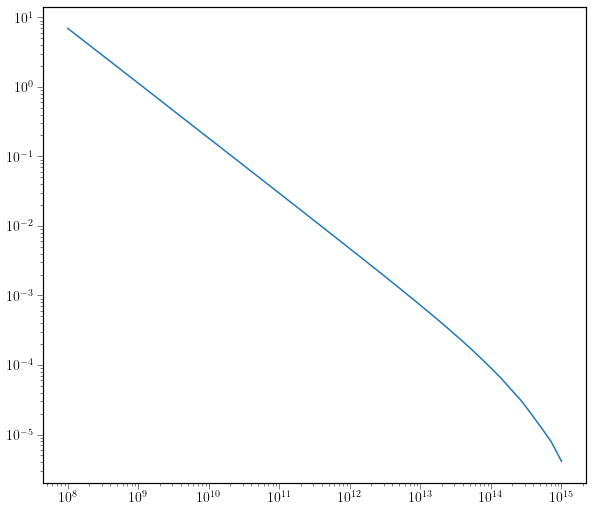

In [19]:
m_vals = np.logspace(8,15)
z = 9
plt.loglog(m_vals, np.fabs(cd.bubbleFunc[1](m_vals,z)))

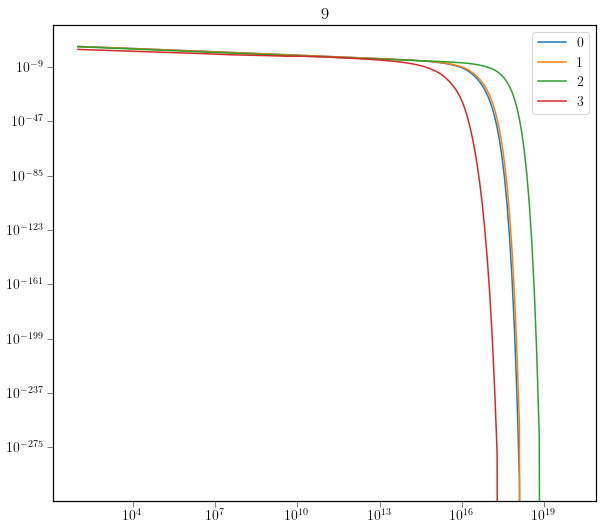

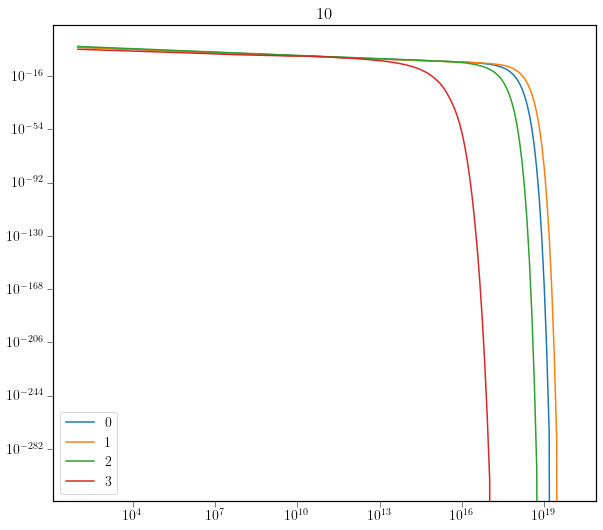

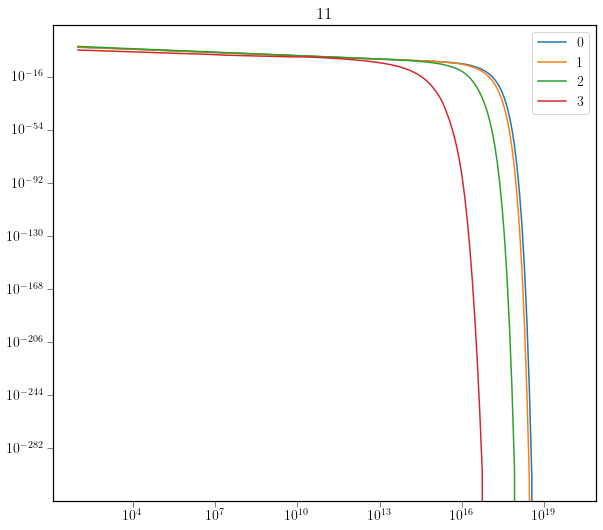

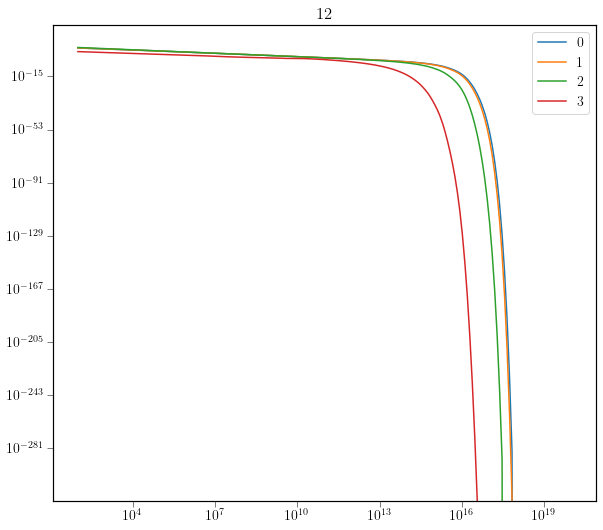

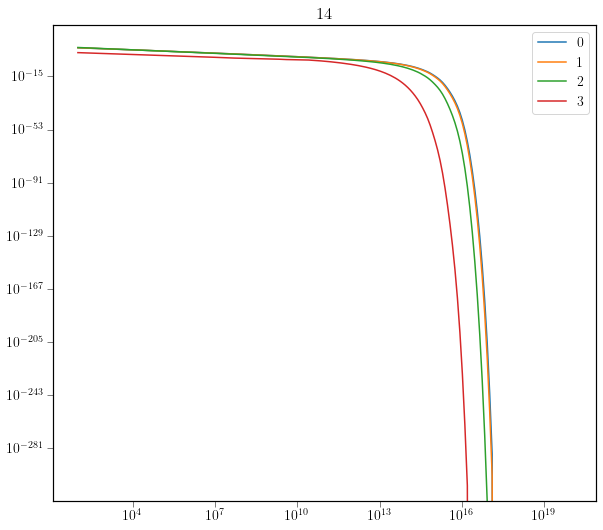

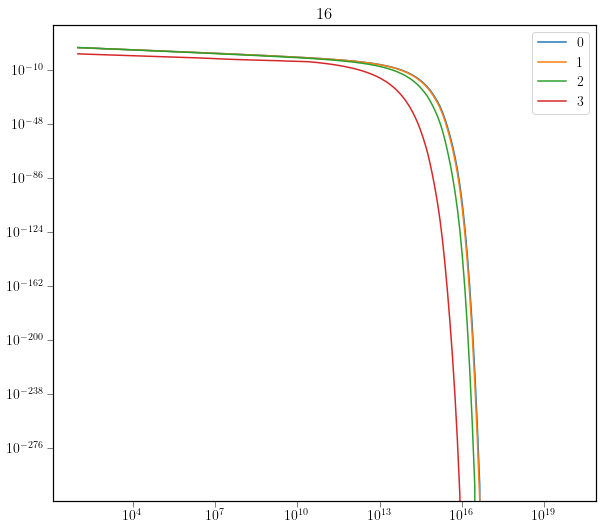

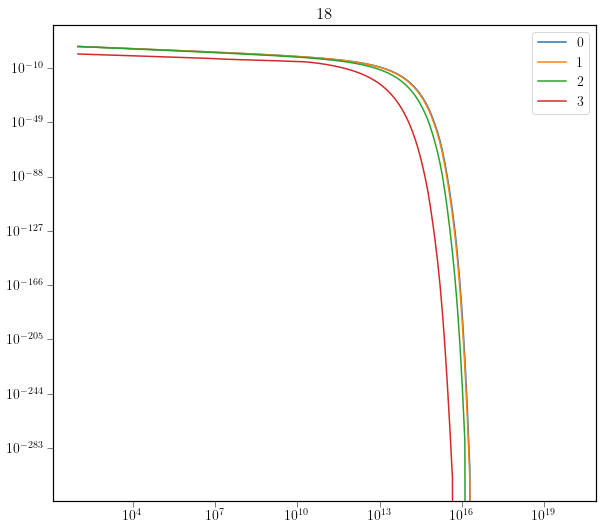

In [25]:
m_vals = np.logspace(2,20,200)
z_vals = [9,10,11,12,14,16,18]
for z in z_vals:
    plt.figure()
    plt.title(z)
    for i, cosmo in enumerate(cd.cosmos):
        plt.loglog(m_vals,np.fabs(cd.bubbleFunc[i](m_vals,z)),label=i)
    plt.legend()

/home/emelnick/anaconda3/lib/python3.9/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "


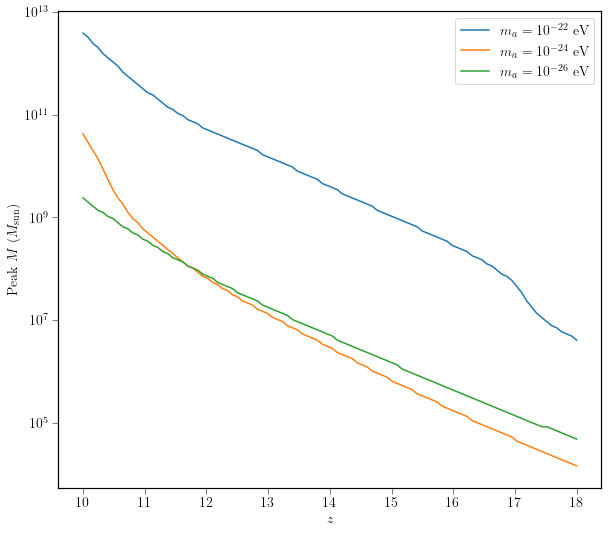

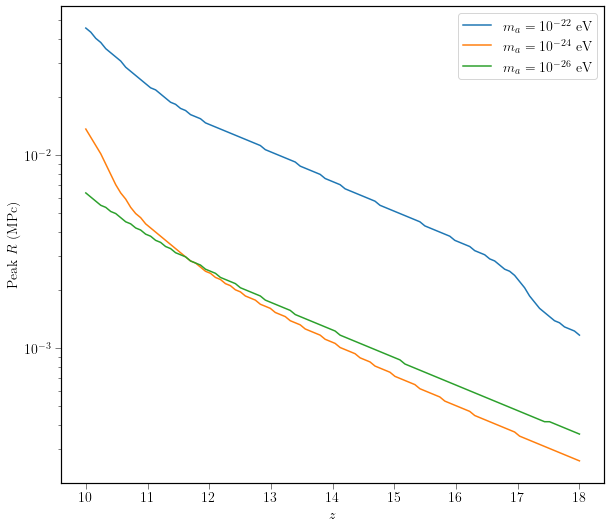

In [117]:
z_vals = np.linspace(10,18,100)
cd.z_vals_sigma = np.linspace(10,18,100)
zeta = 40
m_vals = np.logspace(0,20,500)

for i, cosmo in enumerate(cd.cosmos[0:3]):
    mass_peak = []
    R_peak = []
    for z in z_vals:
        max_index = np.argmax(np.fabs((m_vals/rho)*cd.bubbleFunc[i](m_vals,z)))
        max_mass = m_vals[max_index]
        max_R = R_vals[max_index]
        mass_peak.append(max_mass)
        R_peak.append(max_R)
    plt.figure(0)
    plt.plot(z_vals,mass_peak,label=f'$m_a = 10^{{-{22+2*i}}}$ eV')
    plt.figure(1)
    plt.plot(z_vals,R_peak,label=f'$m_a = 10^{{-{22+2*i}}}$ eV')
plt.figure(0)
plt.ylabel(r'Peak $M$ ($M_{\text{sun}}$)')
plt.xlabel('$z$')
plt.yscale('log')
plt.legend()
plt.figure(1)
plt.ylabel('Peak $R$ (MPc)')
plt.xlabel('$z$')
plt.yscale('log')
plt.legend()


In [127]:
cd.reset_cosmo()

In [129]:
for i in range(7):
    log10m = -20-i
    m = 10**log10m
    cd.new_cosmo(name=f'{log10m}',m_ax=m,ax_frac=0.25,h_param=0.72,rhff=True)

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
/home/emelnick/anaconda3/lib/python3.9/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signall

Q = 0.0008370156030369253
Q = 0.0001292270495613389
Q = 9.645480474817058e-05
Q = 0.0004537555701032506
Q = 7.658723449868692e-05
Q = 6.137007937888963e-05
Q = 0.00027637208126508916
Q = 5.0027334711042717e-05
Q = 4.214021441783735e-05
Q = 5.2388668831786315e-05
Q = 6.170253564833389e-06
Q = 5.398233726293555e-06
Q = 9.665008050511519e-06
Q = 6.93780720593716e-07
Q = 6.417113103962203e-07
Q = 1.6743806472501246e-06
Q = 6.899191635059223e-08
Q = 6.883609292301115e-08
Q = 2.6597515646999773e-07
Q = 5.961493360799965e-09
Q = 6.555411277239456e-09


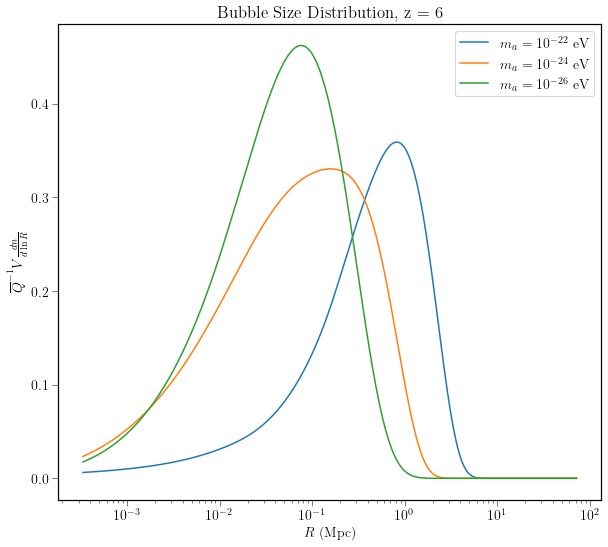

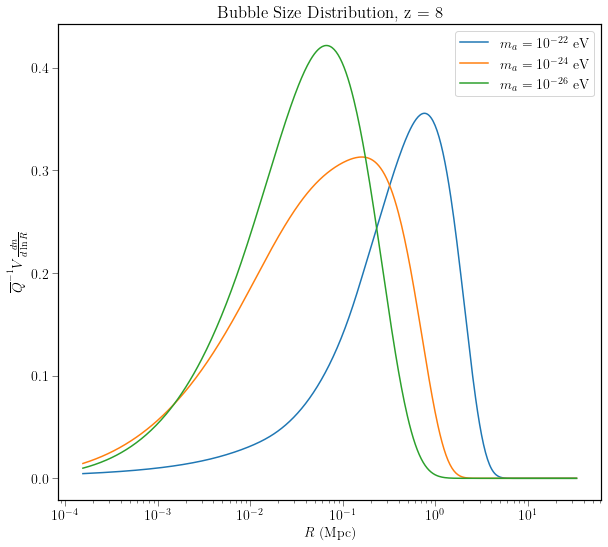

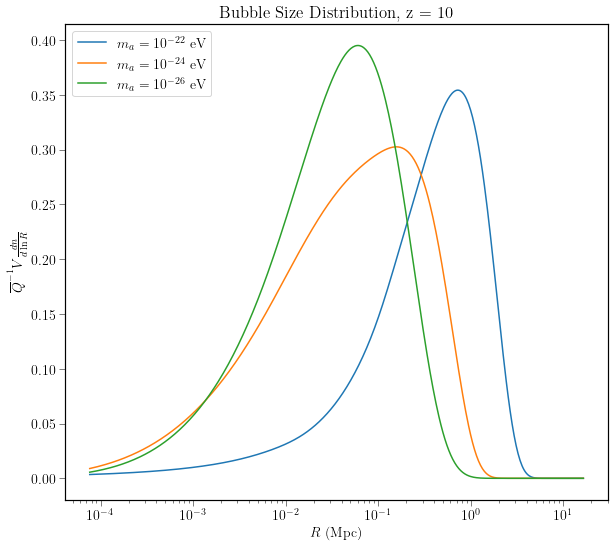

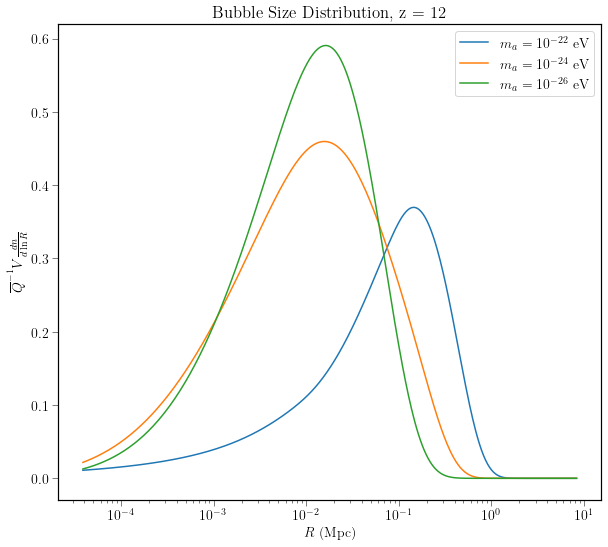

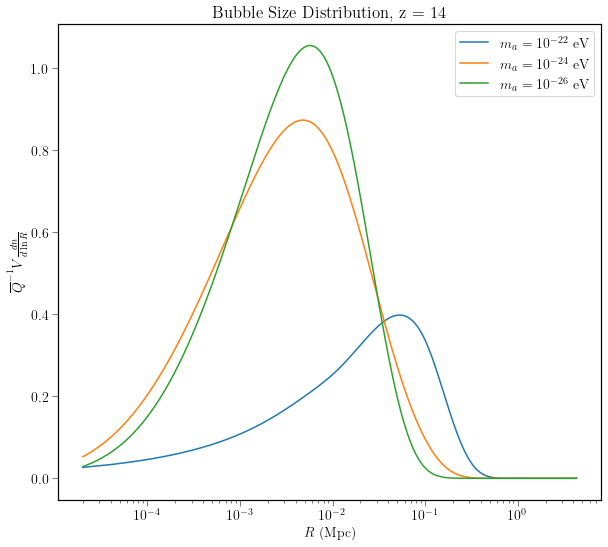

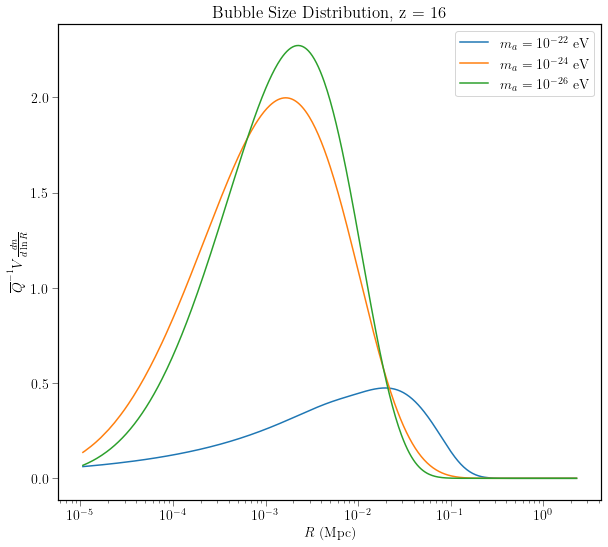

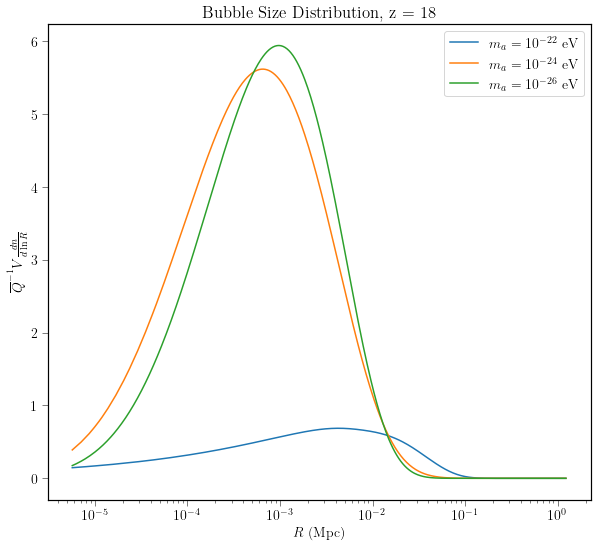

In [120]:
# cd.load_cosmology('changing_m_axfrac0.1.pkl')

z_vals = [10,12,14,16,18]
# cd.z_vals_sigma = np.linspace(6,18,1000)
zeta = 40

# for i, cosmo in enumerate(cd.cosmos[0:3]):
#     bmf = cd.bubbleFunc[i]
#     sigma = cd.sigmaInt[i]
#     plt.figure()
#     z = 18
#     # mMin = (1.308695e-10) * ((cosmo.RHO_C*1000 * cosmo.OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2) # Included Delta in pre-eval w/ cosmology.py OmegaM property and in solar masses
#     # rho = cosmo.rho_mean * (1+z)**3

#     # integrand = lambda m: (np.exp(m)/rho) * bmf(np.exp(m),z)
#     # Q = quad(integrand,np.log(mMin),np.log(1e27))[0]
#     # Q = romberg(integrand,np.log(mMin),np.log(1e27))
#     for z in z_vals:
#         rho = cosmo.rho_mean * (1+z)**3
#         mMin = (1.308695e-10) * ((cosmo.RHO_C*1000 * cosmo.OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2) # Included Delta in pre-eval w/ cosmology.py OmegaM property and in solar masses
        
#         integrand = lambda m: (np.exp(m)/rho) * bmf(np.exp(m),z)
#         Q = cd.integrate(integrand,np.log(mMin),np.log(1e27))
    
#         # Q = quad(integrand,np.log(mMin),np.log(1e27))[0]
#         # Q = romberg(integrand,np.log(mMin),np.log(1e27))        
        
#         # print(f'Q = {Q}')
#         m_vals = np.logspace(0,20,500)
#         R_vals = sigma.radius_of_mass(zeta*m_vals) * (1+z)**(-1)
#         # R_vals = sigma.radius_of_mass(m_vals)
        
#         plt.plot(R_vals,3*(1/Q)*(m_vals/rho)*bmf(m_vals,z),label=f'z = {z}')
#         # plt.axvline(sigma.radius_of_mass(mMin),c='black',linestyle='dashed')
#         plt.xscale('log')
#         plt.title(f'$m_a = 10^{{{22+2*i}}}$ eV Bubble Size Distribution')
#         plt.xlabel(r"$R$ (Mpc)")
#         plt.ylabel(r"$\overline Q^{-1}V\frac{dn}{d\ln R}$")
#         plt.legend()
#         # plt.savefig(f'bubble_dist_norm_{i}.pdf')
#         # plt.savefig(f'bubble_dist_rel10_{i}.pdf')

for z in [6,8,10,12,14,16,18]:
    # Uncomment these lines to normalize each curve relative to λCDM distribution
    # mMin = (1.308695e-10) * ((cd.cosmos[0].RHO_C*1000 * cd.cosmos[0].OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2) 
    # rho = cd.cosmos[0].rho_mean * (1+z)**3
    # integrand = lambda m: (np.exp(m)/rho) * cd.bubbleFunc[0](np.exp(m),z) 
    # Q = quad(integrand,np.log(mMin),np.log(1e27))[0]
    
    plt.figure()
    for i, cosmo in enumerate(cd.cosmos[0:3]):
        rho = cosmo.rho_mean * (1+z)**3
        mMin = (1.308695e-10) * ((cosmo.RHO_C*1000 * cosmo.OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2)

        # Uncomment these lines to normalize each curve relative to its own distribution
        # Function object integration
        # integrand = lambda m: (np.exp(m)/rho) * cd.bubbleFunc[i](np.exp(m),z) 
        # Q = quad(integrand,np.log(mMin),np.log(1e27))[0]
        # Q = romberg(integrand,np.log(mMin),np.log(1e27))
        
        # Inthelper
        integrand = lambda m: (np.exp(m)/rho) * cd.bubbleFunc[i](np.exp(m),z)
        Q = cd.integrate(integrand,np.log(mMin),np.log(1e27))
        
        print(f'Q = {Q}')
        m_vals = np.logspace(4-z/3,20-z/3,500)
        R_vals = cd.sigmaInt[i].radius_of_mass(zeta*m_vals) * (1+z)**(-1)
        
        plt.plot(R_vals,3*(1/Q)*(m_vals/rho)*cd.bubbleFunc[i](m_vals,z),label=f'$m_a = 10^{{-{22+2*i}}}$ eV')
        # plt.axvline(sigma.radius_of_mass(mMin),c='black',linestyle='dashed')
        plt.xscale('log')
        plt.title(f'Bubble Size Distribution, z = {z}')
        plt.xlabel(r"$R$ (Mpc)")
        plt.ylabel(r"$\overline Q^{-1}V\frac{dn}{d\ln R}$")
        plt.legend()
        plt.savefig(f'bubbl_dist_m_z{z}.pdf')


In [93]:
print(cd.cosmos[2].m_axion)

1e-26


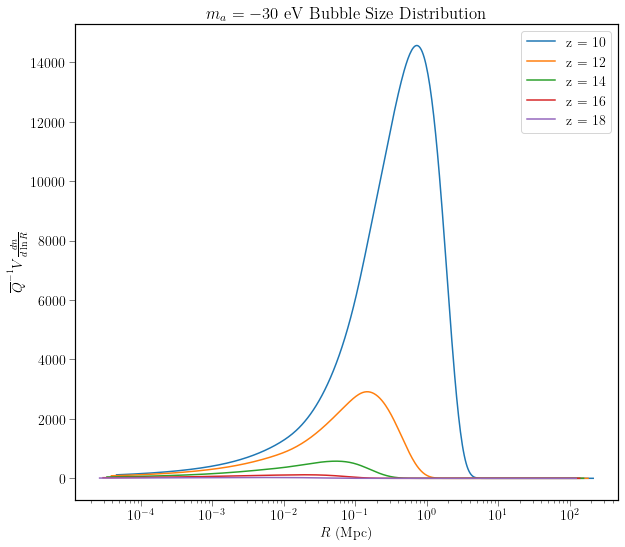

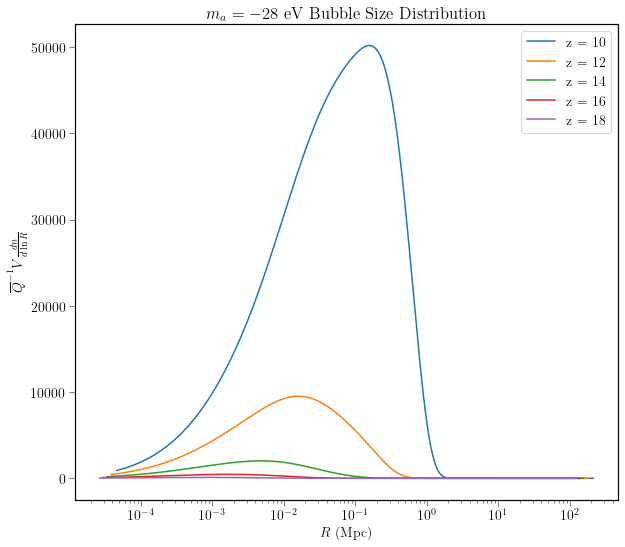

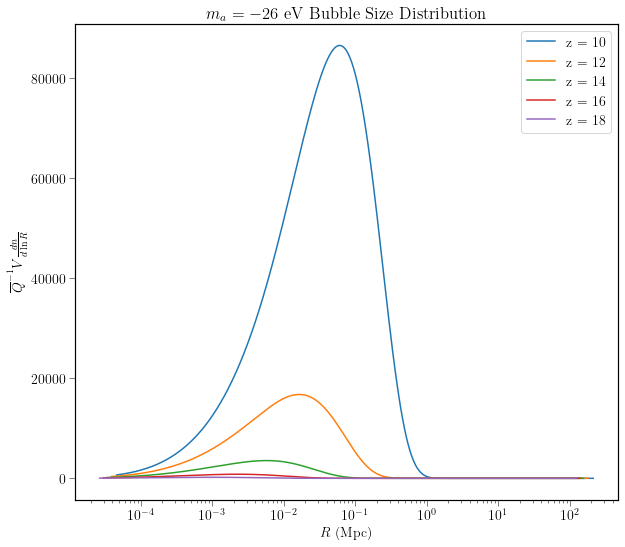

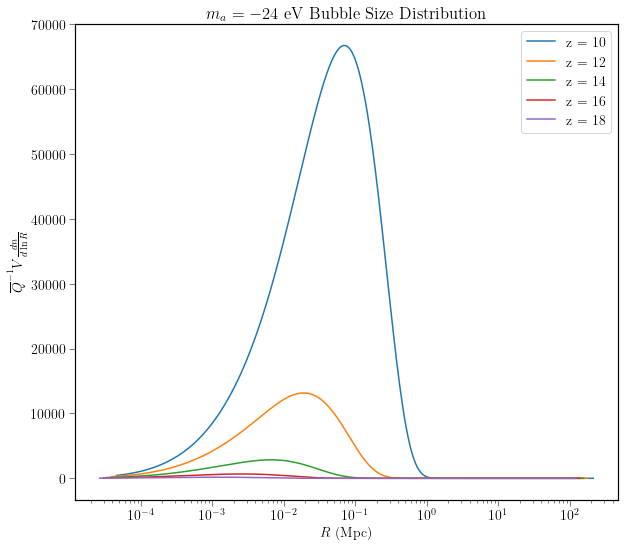

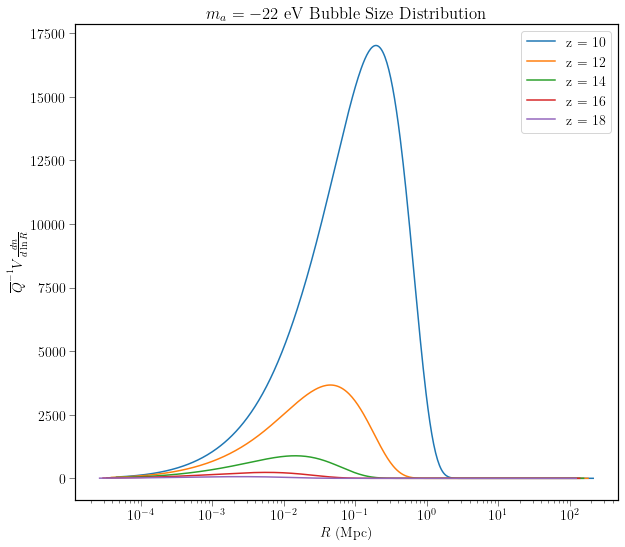

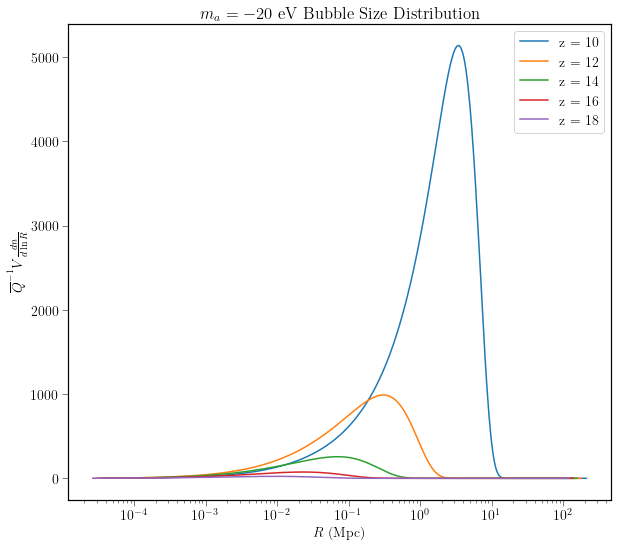

In [47]:
# cd.load_cosmology('changing_m_axfrac0.1.pkl')

z_vals = [10,12,14,16,18]
zeta = 40
plt.rc('text',usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times New Roman']})

for i, cosmo in enumerate(cd.cosmos):
    bmf = cd.bubbleFunc[i]
    sigma = cd.sigmaInt[i]
    plt.figure()
    z = 18
    # mMin = (1.308695e-10) * ((cosmo.RHO_C*1000 * cosmo.OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2) # Included Delta in pre-eval w/ cosmology.py OmegaM property and in solar masses
    # rho = cosmo.rho_mean * (1+z)**3

    integrand = lambda m: (np.exp(m)/rho) * bmf(np.exp(m),z)
    # Q = quad(integrand,np.log(mMin),np.log(1e27))[0]
    Q = romberg(integrand,np.log(mMin),np.log(1e27))
    for z in z_vals:
        rho = cosmo.rho_mean * (1+z)**3
        
        # mMin = (1.308695e-10) * ((cosmo.RHO_C*1000 * cosmo.OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2) # Included Delta in pre-eval w/ cosmology.py OmegaM property and in solar masses
        # integrand = lambda m: (np.exp(m)/rho) * bmf(np.exp(m),z)
        # Q = quad(integrand,np.log(mMin),np.log(1e27))[0]
        
        # Q = romberg(integrand,np.log(mMin),np.log(1e27))
        
        # print(f'Q = {Q}')
        m_vals = np.logspace(0,20,500)
        R_vals = sigma.radius_of_mass(zeta*m_vals) * (1+z)**(-1)
        # R_vals = sigma.radius_of_mass(m_vals)
        
        plt.plot(R_vals,(1/Q)*4*np.pi*(R_vals)**3 * bmf(m_vals,z),label=f'z = {z}')
        # plt.axvline(sigma.radius_of_mass(mMin),c='black',linestyle='dashed')
        plt.xscale('log')
        plt.title(f'$m_a = {-30+2*i}$ eV Bubble Size Distribution')
        plt.xlabel(r"$R$ (Mpc)")
        plt.ylabel(r"$\overline Q^{-1}V\frac{dn}{d\ln R}$")
        plt.legend()
        # plt.savefig(f'bubble_dist_norm_{i}.pdf')
        # plt.savefig(f'bubble_dist_rel10_{i}.pdf')

Q = -0.9997203738550877
Q = -0.9995660154190266
Q = -0.9917357785266009
Q = -0.4388143143416658
Q = -0.002913288220902522
Q = -0.0029127558924116176
Q = -0.002902916806940315
Q = -0.0029034665245278243
Q = 0.00014636427009635133
Q = 0.00014063255556374355
Q = 9.82406388316852e-05
Q = 2.7618878634302943e-06
Q = 3.9669088845386525e-06
Q = 3.717200264358205e-06
Q = 2.0143999582981465e-06
Q = 4.167484024825454e-10


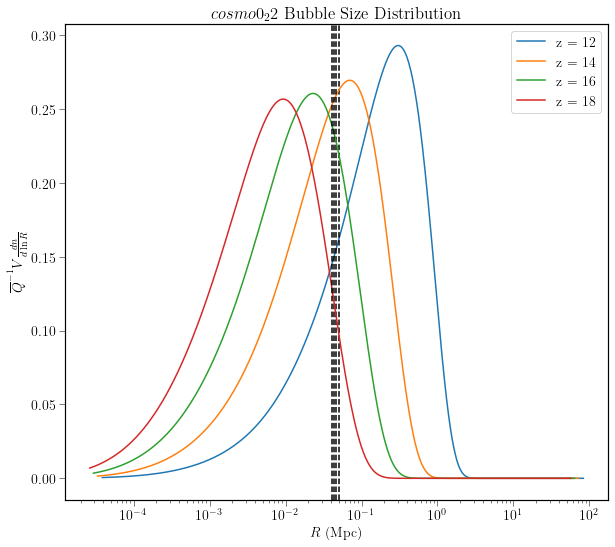

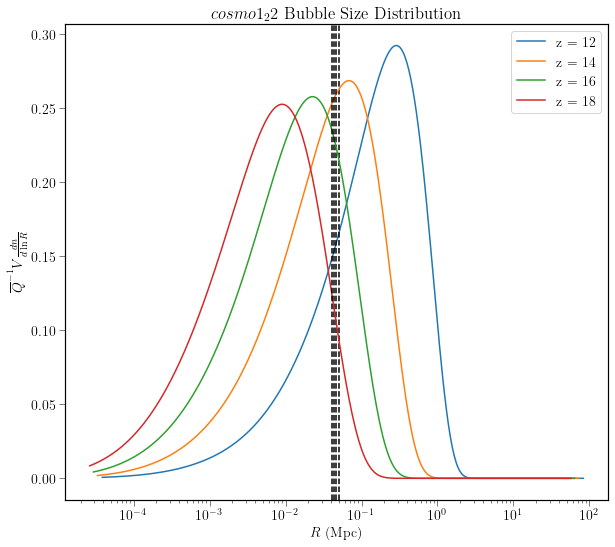

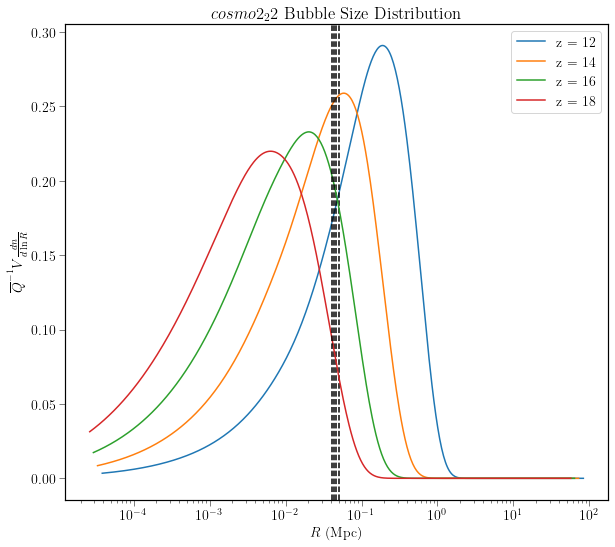

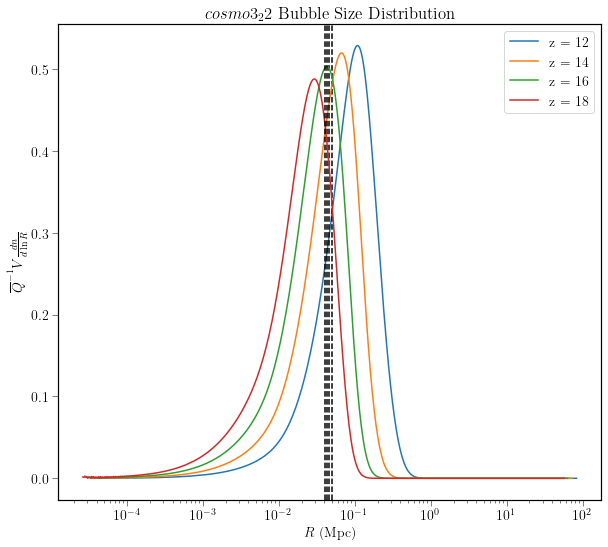

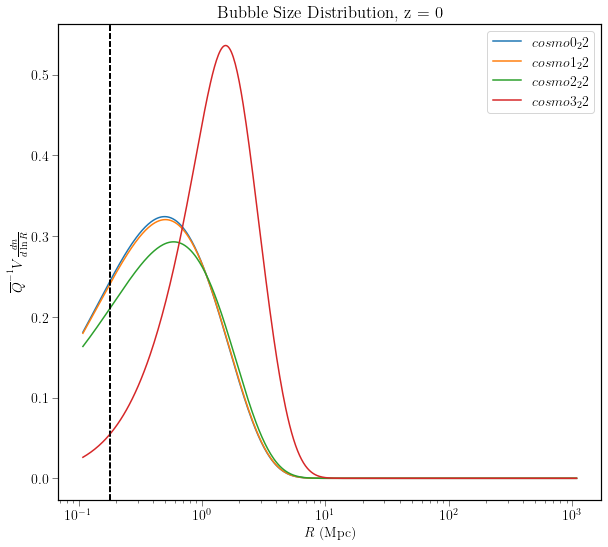

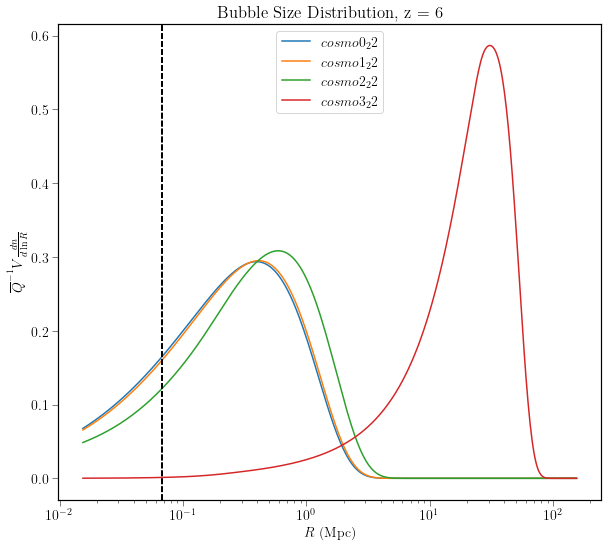

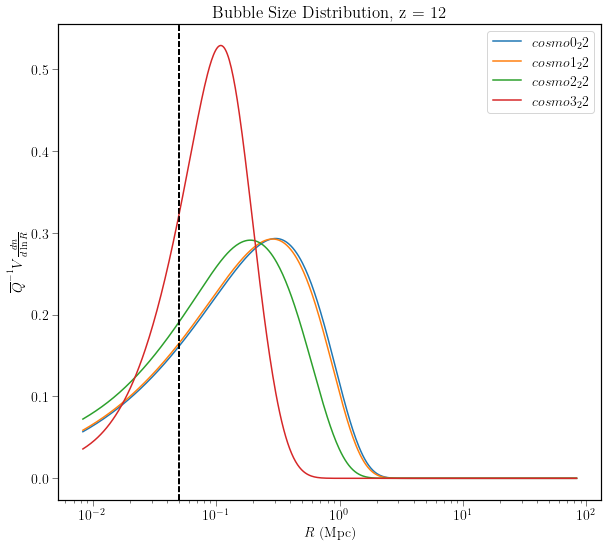

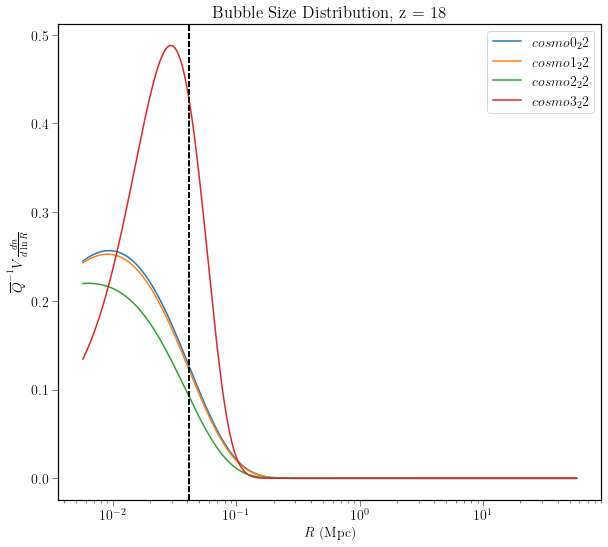

In [36]:
# cosmo_22

z_vals = [12,14,16,18]
zeta = 40
plt.rc('text',usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times New Roman']})

for i, cosmo in enumerate(cd.cosmos):
    bmf = cd.bubbleFunc[i]
    sigma = cd.sigmaInt[i]
    plt.figure()
    z = 18
    # mMin = (1.308695e-10) * ((cosmo.RHO_C*1000 * cosmo.OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2) # Included Delta in pre-eval w/ cosmology.py OmegaM property and in solar masses
    # rho = cosmo.rho_mean * (1+z)**3

    # integrand = lambda m: (np.exp(m)/rho) * bmf(np.exp(m),z)
    # Q = quad(integrand,np.log(mMin),np.log(1e27))[0]
    # Q = romberg(integrand,np.log(mMin),np.log(1e27))
    for z in z_vals:
        
        rho = cosmo.rho_mean * (1+z)**3
        mMin = (1.308695e-10) * ((cosmo.RHO_C*1000 * cosmo.OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2) 
        
        # Function object integration
        # integrand = lambda m: (np.exp(m)/rho) * bmf(np.exp(m),z)
        # Q = quad(integrand,np.log(mMin),np.log(1e27))[0]
        # Q = romberg(integrand,np.log(mMin),np.log(1e27))
        
        #Fixed sample integration
        # m = np.linspace(np.log(mMin),np.log(1e27))
        # Q = trapezoid((np.exp(m)/rho) * cd.bubbleFunc[i](np.exp(m),z),m)
        
        #Inthelper
        integrand = lambda m: (np.exp(m)/rho) * cd.bubbleFunc[i](np.exp(m),z) 
        Q = cd.integrate(integrand,np.log(1e1),np.log(1e25))
        
        # print(f'Q = {Q}')
        m_vals = np.logspace(0,19,500)
        R_vals = sigma.radius_of_mass(zeta*m_vals) * (1+z)**(-1)
        # R_vals = sigma.radius_of_mass(m_vals)

        plt.plot(R_vals,3*(1/Q)*(m_vals/rho)*bmf(m_vals,z),label=f'z = {z}')
        plt.axvline(sigma.radius_of_mass(mMin),c='black',linestyle='dashed')
        plt.xscale('log')
        plt.title(f'${cd.cosmo_names[i]}$ Bubble Size Distribution')
        plt.xlabel(r"$R$ (Mpc)")
        plt.ylabel(r"$\overline Q^{-1}V\frac{dn}{d\ln R}$")
        plt.legend()
        # plt.savefig(f'bubble_dist_norm_{i}.pdf')
        # plt.savefig(f'bubble_dist_rel10_{i}.pdf')

zeta = 40
plt.rc('text',usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times New Roman']})

for z in [0,6,12,18]:
    # Uncomment these lines to normalize each curve relative to λCDM distribution
    # mMin = (1.308695e-10) * ((cd.cosmos[0].RHO_C*1000 * cd.cosmos[0].OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2) 
    # rho = cd.cosmos[0].rho_mean * (1+z)**3
    # integrand = lambda m: (np.exp(m)/rho) * cd.bubbleFunc[0](np.exp(m),z) 
    # Q = quad(integrand,np.log(mMin),np.log(1e27))[0]
    
    plt.figure()
    for i, cosmo in enumerate(cd.cosmos):
        rho = cosmo.rho_mean * (1+z)**3

        # Uncomment these lines to normalize each curve relative to its own distribution
        mMin = (1.308695e-10) * ((cosmo.RHO_C*1000 * cosmo.OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2)
        
        #Function object integration
        # integrand = lambda m: (np.exp(m)/rho) * cd.bubbleFunc[i](np.exp(m),z) 
        # Q = quad(integrand,np.log(mMin),np.log(1e27))[0]
        # Q = romberg(integrand,np.log(mMin),np.log(1e27),divmax=13)
        
        #Fixed sample integration
        # m = np.linspace(np.log(mMin),np.log(1e27))
        # Q = trapezoid((np.exp(m)/rho) * cd.bubbleFunc[i](np.exp(m),z),m)
        
        #Inthelper
        integrand = lambda m: (np.exp(m)/rho) * cd.bubbleFunc[i](np.exp(m),z) 
        Q = cd.integrate(integrand,np.log(1e1),np.log(1e25))
        
        print(f'Q = {Q}')
        m_vals = np.logspace(7,19,500)
        R_vals = cd.sigmaInt[i].radius_of_mass(zeta*m_vals) * (1+z)**(-1)
        
        plt.plot(R_vals,3*(1/Q)*(m_vals/rho)*cd.bubbleFunc[i](m_vals,z),label=f'${cd.cosmo_names[i]}$')
        plt.axvline(sigma.radius_of_mass(mMin),c='black',linestyle='dashed')

        plt.xscale('log')
        plt.title(f'Bubble Size Distribution, z = {z}')
        plt.xlabel(r"$R$ (Mpc)")
        plt.ylabel(r"$\overline Q^{-1}V\frac{dn}{d\ln R}$")
        plt.legend()
        # plt.savefig(f'bubble_dist_Lrel_z{z}.pdf')
        # plt.savefig(f'bubble_dist_norm_z{z}.pdf')


Q = -0.0024668283659085525
Q = -0.0025477158415661174
Q = -0.00276650201684791
Q = 0.0016428884985682987
Q = 0.00020139932006057402
Q = 5.494877937415998e-05
Q = 1.8143697765847813e-05
Q = -0.0013124515776076334
Q = -0.0013452541731914412
Q = 0.0007697768105314106
Q = 0.00013311912628487176
Q = 6.401176383327575e-06
Q = 1.3158572314822545e-06
Q = 3.2176771588013936e-07
Q = 0.0005330741809738351
Q = 0.00035155393787149737
Q = 0.00010630328406959698
Q = 9.436793022913454e-06
Q = 1.3708829498553223e-07
Q = 2.220907345083931e-08
Q = 3.966170003337161e-09
Q = 0.00012507148426605804
Q = 7.070389729787527e-05
Q = 1.450872835136837e-05
Q = 5.745580541735999e-07
Q = 2.10242874107051e-09
Q = 2.9294348101635363e-10
Q = 3.8567363775727095e-11
Q = 2.929358175457956e-05
Q = 1.3683819118677703e-05
Q = 1.7404344235680124e-06
Q = 2.6100635211711494e-08
Q = 1.9619968282749255e-11
Q = 2.584766620647545e-12
Q = 2.515101942387144e-13
Q = 6.732535930609771e-06
Q = 2.5007212595432837e-06
Q = 1.80649492691902

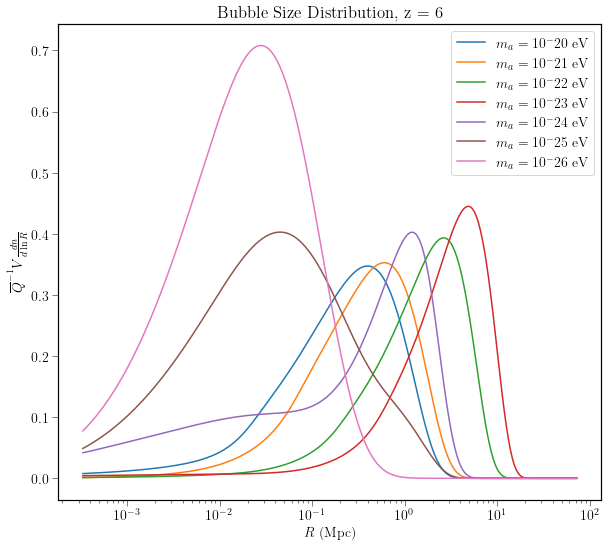

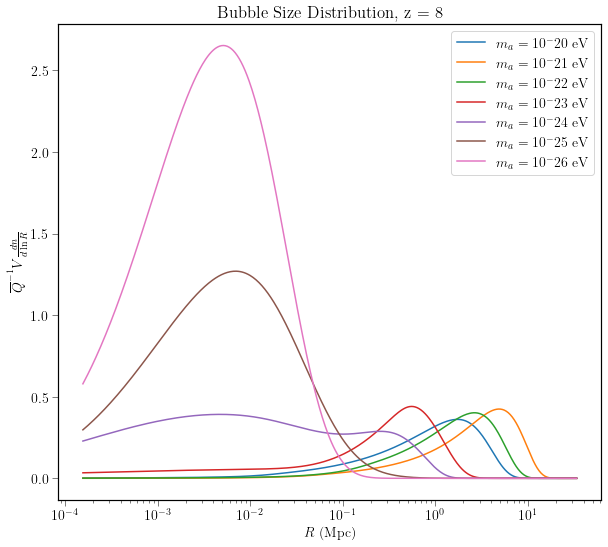

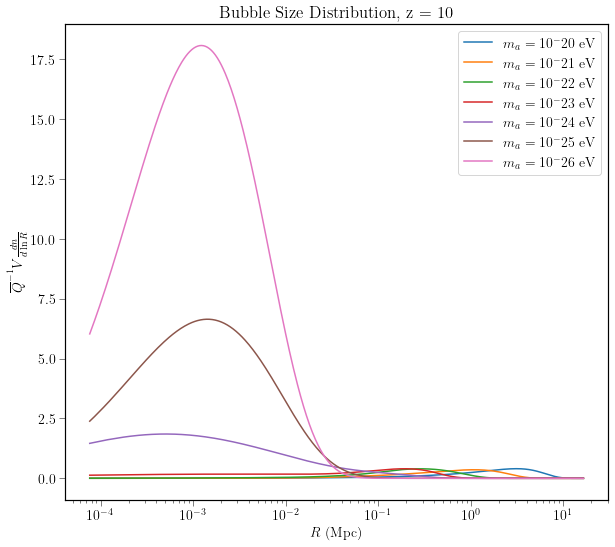

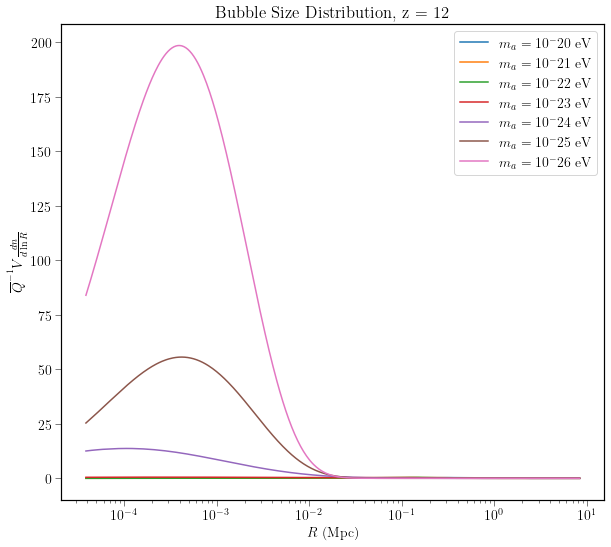

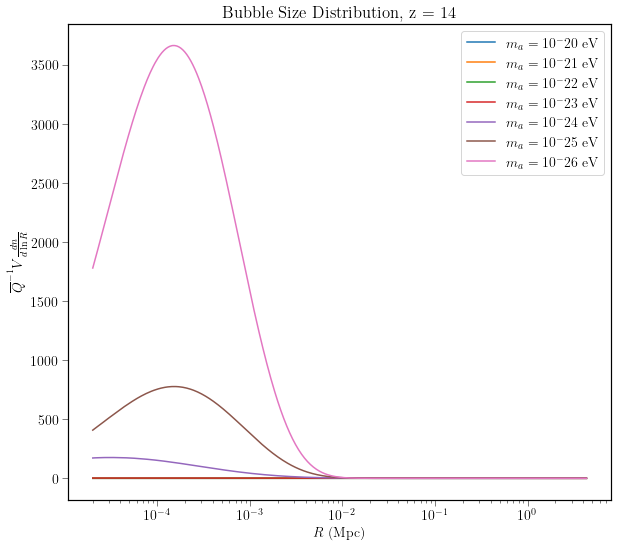

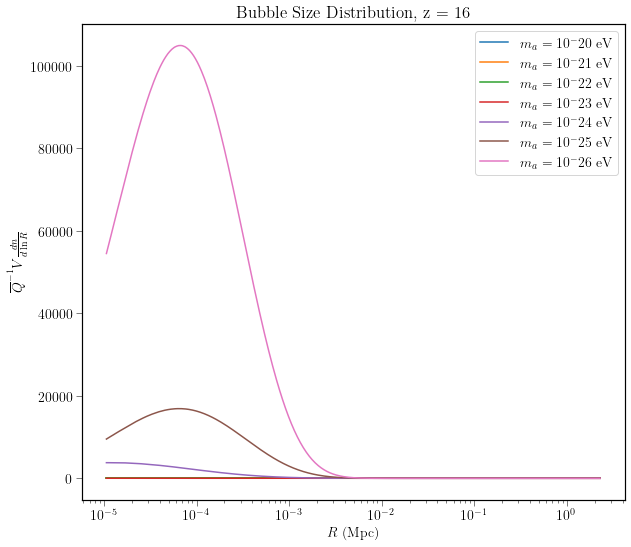

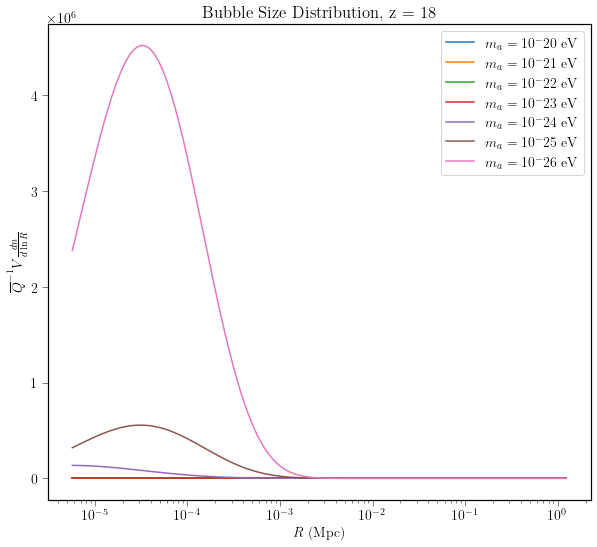

In [135]:
# cd.load_cosmology('changing_m_axfrac0.25.pkl')

# z_vals = [10,12,14,16,18]
# cd.z_vals_sigma = np.linspace(6,18,1000)
zeta = 40

# for i, cosmo in enumerate(cd.cosmos[0:3]):
#     bmf = cd.bubbleFunc[i]
#     sigma = cd.sigmaInt[i]
#     plt.figure()
#     z = 18
#     # mMin = (1.308695e-10) * ((cosmo.RHO_C*1000 * cosmo.OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2) # Included Delta in pre-eval w/ cosmology.py OmegaM property and in solar masses
#     # rho = cosmo.rho_mean * (1+z)**3

#     # integrand = lambda m: (np.exp(m)/rho) * bmf(np.exp(m),z)
#     # Q = quad(integrand,np.log(mMin),np.log(1e27))[0]
#     # Q = romberg(integrand,np.log(mMin),np.log(1e27))
#     for z in z_vals:
#         rho = cosmo.rho_mean * (1+z)**3
#         mMin = (1.308695e-10) * ((cosmo.RHO_C*1000 * cosmo.OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2) # Included Delta in pre-eval w/ cosmology.py OmegaM property and in solar masses
        
#         integrand = lambda m: (np.exp(m)/rho) * bmf(np.exp(m),z)
#         Q = cd.integrate(integrand,np.log(mMin),np.log(1e27))
    
#         # Q = quad(integrand,np.log(mMin),np.log(1e27))[0]
#         # Q = romberg(integrand,np.log(mMin),np.log(1e27))        
        
#         # print(f'Q = {Q}')
#         m_vals = np.logspace(0,20,500)
#         R_vals = sigma.radius_of_mass(zeta*m_vals) * (1+z)**(-1)
#         # R_vals = sigma.radius_of_mass(m_vals)
        
#         plt.plot(R_vals,3*(1/Q)*(m_vals/rho)*bmf(m_vals,z),label=f'z = {z}')
#         # plt.axvline(sigma.radius_of_mass(mMin),c='black',linestyle='dashed')
#         plt.xscale('log')
#         plt.title(f'$m_a = 10^{{{22+2*i}}}$ eV Bubble Size Distribution')
#         plt.xlabel(r"$R$ (Mpc)")
#         plt.ylabel(r"$\overline Q^{-1}V\frac{dn}{d\ln R}$")
#         plt.legend()
#         # plt.savefig(f'bubble_dist_norm_{i}.pdf')
#         # plt.savefig(f'bubble_dist_rel10_{i}.pdf')

for z in [6,8,10,12,14,16,18]:
    # Uncomment these lines to normalize each curve relative to λCDM distribution
    # mMin = (1.308695e-10) * ((cd.cosmos[0].RHO_C*1000 * cd.cosmos[0].OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2) 
    # rho = cd.cosmos[0].rho_mean * (1+z)**3
    # integrand = lambda m: (np.exp(m)/rho) * cd.bubbleFunc[0](np.exp(m),z) 
    # Q = quad(integrand,np.log(mMin),np.log(1e27))[0]
    
    plt.figure()
    for i, cosmo in enumerate(cd.cosmos):
        rho = cosmo.rho_mean * (1+z)**3
        mMin = (1.308695e-10) * ((cosmo.RHO_C*1000 * cosmo.OmegaM)**(-1/2)) * ((1+z)**(-3/2)) * (1e4)**(3/2)

        # Uncomment these lines to normalize each curve relative to its own distribution
        # Function object integration
        # integrand = lambda m: (np.exp(m)/rho) * cd.bubbleFunc[i](np.exp(m),z) 
        # Q = quad(integrand,np.log(mMin),np.log(1e27))[0]
        # Q = romberg(integrand,np.log(mMin),np.log(1e27))
        
        # Inthelper
        integrand = lambda m: (np.exp(m)/rho) * cd.bubbleFunc[i](np.exp(m),z)
        Q = cd.integrate(integrand,np.log(mMin),np.log(1e27))
        
        print(f'Q = {Q}')
        m_vals = np.logspace(4-z/3,20-z/3,500)
        R_vals = cd.sigmaInt[i].radius_of_mass(zeta*m_vals) * (1+z)**(-1)
        
        plt.plot(R_vals,3*(1/Q)*(m_vals/rho)*cd.bubbleFunc[i](m_vals,z),label=f'$m_a = 10^{cd.cosmo_names[i]}$ eV')
        # plt.axvline(sigma.radius_of_mass(mMin),c='black',linestyle='dashed')
        plt.xscale('log')
        plt.title(f'Bubble Size Distribution, z = {z}')
        plt.xlabel(r"$R$ (Mpc)")
        plt.ylabel(r"$\overline Q^{-1}V\frac{dn}{d\ln R}$")
        plt.legend()
        plt.savefig(f'bubbl_dist_m_z{z}.pdf')


/home/emelnick/anaconda3/lib/python3.9/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "


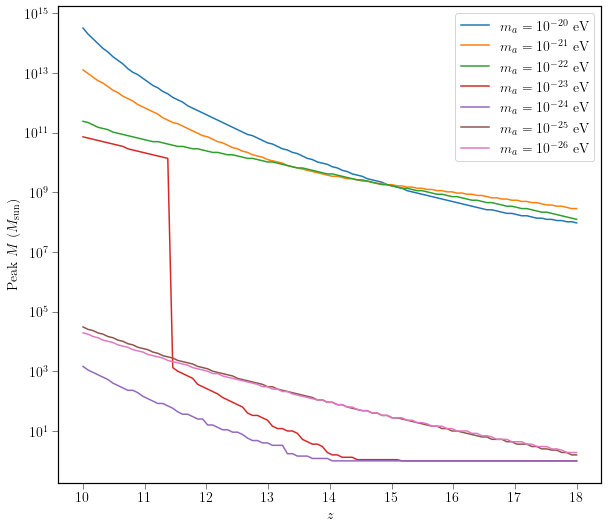

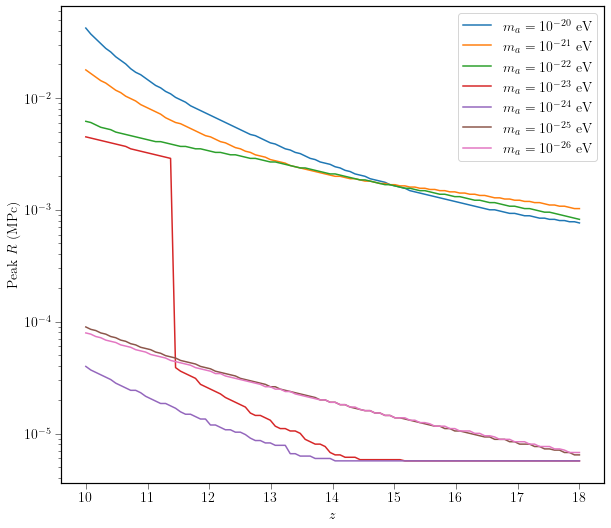

In [137]:
z_vals = np.linspace(10,18,100)
cd.z_vals_sigma = np.linspace(10,18,100)
zeta = 40
m_vals = np.logspace(0,20,500)

for i, cosmo in enumerate(cd.cosmos):
    mass_peak = []
    R_peak = []
    for z in z_vals:
        max_index = np.argmax(np.fabs((m_vals/rho)*cd.bubbleFunc[i](m_vals,z)))
        max_mass = m_vals[max_index]
        max_R = R_vals[max_index]
        mass_peak.append(max_mass)
        R_peak.append(max_R)
    plt.figure(0)
    plt.plot(z_vals,mass_peak,label=f'$m_a = 10^{{{cd.cosmo_names[i]}}}$ eV')
    plt.figure(1)
    plt.plot(z_vals,R_peak,label=f'$m_a = 10^{{{cd.cosmo_names[i]}}}$ eV')
plt.figure(0)
plt.ylabel(r'Peak $M$ ($M_{\text{sun}}$)')
plt.xlabel('$z$')
plt.yscale('log')
plt.legend()
plt.figure(1)
plt.ylabel('Peak $R$ (MPc)')
plt.xlabel('$z$')
plt.yscale('log')
plt.legend()